In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
file_data = '/Users/cemalarican/Desktop/1000 GARCHES/YEAR/'
file_main_data = '/Users/cemalarican/Desktop/1000 GARCHES/YEAR/MAIN_DATA_YEAR/'

years = [2015, 2016, 2017, 2018]

# before the swap: stock1 actually equals stock2
coint_pairs = pd.read_csv('/Users/cemalarican/Desktop/THESIS/pairs_to_investigate.csv')

import sys  
sys.path.insert(0, '/Users/cemalarican/Desktop/THESIS/')

from pipeLine import Pipeline

In [2]:
data = pd.DataFrame()

# originally 239
for year in years:
    data['perf_' + str(year)] = pd.read_csv(file_data + 'pair_sim_' + str(year)+'.csv').iloc[-1]

data.drop('Unnamed: 0', inplace=True)

idx = list(data.index)

for year in years:
    d =  pd.read_csv(file_data + 'MAIN_DATA_YEAR/pair_sim_'+ str(year) +'.csv').groupby('symbol')
    alphas = []
    betas = []
    sharpes = []
    maxdraw = []
    for i in range(239):
        
        stock_alpha = d.get_group(idx[i]).alpha.iloc[-1]
        stock_beta = d.get_group(idx[i]).beta.iloc[-1]
        stock_sharpe = d.get_group(idx[i]).sharpe.iloc[-1]
        stock_maxdraw = d.get_group(idx[i]).max_drawdown.iloc[-1]
        alphas.append(stock_alpha)
        betas.append(stock_beta)
        sharpes.append(stock_sharpe)

    data['alpha_' + str(year)] = alphas
    data['beta_' + str(year)] = betas
    data['sharpe_' + str(year)] = sharpes


data['STAT'] = [list(data.index)[i].split(':')[1] for i in range(len(data)) ]

for year in years:
    data['pct_'+str(year)] = (data['perf_' +str(year)]/100000) -1
    
data

perf_2015    perf_2016    perf_2017    perf_2018  \
MZZ vs SMDD:NON-STAT    89914.9      83439.4      94921.6      89957.6   
EDV vs UBT:NON-STAT      101271       103855       104257       103163   
IVV vs IWB:STAT           94308      89543.1      91887.2      91336.8   
DGL vs SGOL:STAT        88334.7      87590.1      92783.6      91062.4   
PHDG vs VQT:STAT        96385.1      95966.2       153423       167323   
IWV vs SCHB:NON-STAT     101184       100183      92743.7      94051.2   
IWB vs SPY:STAT         96860.3      91023.4      88200.2      88001.1   
IWB vs SSO:STAT          154230       162662       158467       171611   
CURE vs RXL:STAT       -11482.7     -11310.9     -13258.8     -13544.5   
EUSA vs VV:STAT         91721.8      -852625     -45373.4 -4.06108e+06   
PHYS vs SGOL:NON-STAT    100509      98517.7      97761.8      97613.2   
FXP vs YANG:NON-STAT     222411       564267       527102       421626   
SCHB vs VTI:NON-STAT    97454.1      95026.6        87232      89511.7   
DGL vs GLD:STAT          108184       106190       100599       101260   
DLN vs VYM:NON-STAT     99377.5        99067       100252       101661   
FUTY vs XLU:NON-STAT     100330        97040      99602.3       100527   
FXY vs YCL:STAT          215547      -339844      -184361      -245760   
VPU vs XLU:NON-STAT      103220       103924        99245      96936.8   
GLD vs PHYS:STAT        98474.9      86687.6      77839.1      78537.6   
SCHG vs VOOG:STAT       91445.4      89571.1      81929.4      81521.5   
SCHB vs VONE:NON-STAT    100663        99127       105631       100155   
PGF vs PGX:STAT         97987.5      97593.4      96631.1      96286.4   
DOG vs DXD:STAT         89913.6      93566.4       111843       144553   
SBND vs TTT:STAT        76533.1      77409.6      58319.6      61785.7   
DNO vs DTO:NON-STAT     82410.2      54012.4      56108.6      69383.9   
ITOT vs VOO:STAT         101106       122462       138496       128726   
IWB vs SCHB:NON-STAT     102833       102131       111249       107395   
SSO vs VOO:STAT          133552       135358       135093       138014   
IWL vs MGC:STAT          164017  1.38938e+06  4.00495e+06  7.30298e+06   
TBT vs TMV:NON-STAT     96947.3      87222.5      81379.2      73401.7   
...                         ...          ...          ...          ...   
EMES vs EMESQ:STAT      99856.6      99691.2      99657.7      99581.8   
EMES vs EMESZ:STAT      99856.6      99691.2      99657.7      99581.8   
PHIO vs RXII:STAT       96118.2      96118.2       122961       136129   
PTIE vs SAVA:STAT       99824.9      99800.1      99735.4      99500.5   
RAS vs RASFD:STAT       99917.9      99815.4      99485.7      99485.7   
CBS vs VIAC:NON-STAT      99581      99434.6      99437.8      99344.5   
CHI_2 vs QQQC:STAT      54732.1      40304.8       107687 -1.26655e+06   
CUR vs SNCA:STAT          99840        99754       101769       101769   
CWEN vs NYLD:STAT       95512.1      96270.4        97751       110414   
EVLV vs IMBI:STAT       96112.3       122020      2379.44       119400   
IPCI vs IPCIF:STAT       100000       100000       100000       100000   
KEG vs KEGX:STAT         100000       100000       100000       100000   
KEG vs KEGXD:STAT        100000       100000       100000       100000   
MPVD vs MPVDF:STAT      96953.9       166719     -15378.1      -143806   
PIPR vs PJC:STAT         100439       100362       100663      99883.9   
SDRL vs SDRL_:STAT       147505     -65966.9  7.17628e+06   1.0588e+08   
SPN vs SPNV:STAT        79230.6       136768      64370.6       111823   
SPN vs SPNVD:STAT       79230.6       136768      64370.6       111823   
TTS vs TTSH:STAT        99007.3        99293      98955.8        99312   
ANW vs ANWWQ:STAT       99915.7      99873.2      99814.2      99812.3   
ATCO vs SSW:STAT        99940.8      99930.1        99898      99863.2   
BAS vs BASX:STAT        99917.5       517559       517208       516986   
FEU vs SPEU:STAT        99

In [3]:
pnl_data_15 = pd.DataFrame()
pnl_data_16 = pd.DataFrame()
pnl_data_17 = pd.DataFrame()
pnl_data_18 = pd.DataFrame()
tickers = list(data.index)

def get_pnl(year, dbase, year_base):
    d = pd.read_csv(file_main_data + 'pair_sim_' + str(year) + '.csv')
    dg = d.groupby('symbol')
    tickers = list(data.index)
    for i in range(len(dbase)):
        year_base[tickers[i]] = dg.get_group(tickers[i]).pnl.reset_index(drop=True)
    return year_base

def get_pnl_list(pnl_data, yr):
    list_of_pnl = []
    for i in range(len(coint_pairs)):
        tick = pd.DataFrame()
        tick['data'] = pnl_data[tickers[i]]
        tick['pos'] = pnl_data[tickers[i]] > 0

        t = tick.groupby('pos').get_group(False)
        try:
            tt = tick.groupby('pos').get_group(True)
        except KeyError:
            pass

        t_len = len(t)
        tt_len = len(tt)

        t_mean = t['data'].mean()
        tt_mean = tt['data'].mean()

        whole_avg = pnl_data[tickers[i]].mean()

        r = (tickers[i], t_len, tt_len, t_mean, tt_mean, whole_avg, data['perf_'+str(yr)].iloc[i])
        list_of_pnl.append(r)

    return list_of_pnl        


def make_df_pnl(pnl_list, yr):
    df = pd.DataFrame(data=pnl_list, columns=['pair', 'no_loss', 'no_win', 'avg_loss', 'avg_win', 'whole_avg', 'perf_'+str(yr)])
    df.set_index('pair', inplace=True)
    s = list(df.index)
    df['stat'] = [s[i].split(':')[1] for i in range(len(s))]
    df['pos_avg'] = df.whole_avg > 0
    df['win'] = df['perf_'+ str(yr)] > 100000
    tot_days = df['no_loss'] + df['no_win']
    df['loss_percent'] = round(df['no_loss']/tot_days, 2)
    df['win_percent'] = round(df['no_win']/tot_days, 2)
    
    
    return df[df['perf_'+str(yr)] != 100000]


pnl_15 = get_pnl(2015, data, pnl_data_15)
pnl_16 = get_pnl(2016, data, pnl_data_16)
pnl_17 = get_pnl(2017, data, pnl_data_17)
pnl_18 = get_pnl(2018, data, pnl_data_18)

list_15 = get_pnl_list(pnl_15, 2015)
list_16 = get_pnl_list(pnl_16, 2016)
list_17 = get_pnl_list(pnl_17, 2017)
list_18 = get_pnl_list(pnl_18, 2018)

df_15 = make_df_pnl(list_15, 2015)
df_16 = make_df_pnl(list_16, 2016)
df_17 = make_df_pnl(list_17, 2017)
df_18 = make_df_pnl(list_18, 2018)

def get_tables(data, year):
    
    cols = ['no_loss', 'no_win', 'avg_loss','avg_win', 'whole_avg', 'perf_' + str(year), 'loss_percent', 'win_percent']
    
    avg_list = [list(round(data[cols].mean(), 2).reset_index(drop=True))[i] for i in range(8)]
    
    stat_list = list(round(data.groupby('stat').get_group('STAT')[cols].mean(), 2))
    
    nstat_list = list(round(data.groupby('stat').get_group('NON-STAT')[cols].mean(), 2))
    
    stat = data.groupby('stat').get_group('STAT')
    
    win_stat = list(round(stat.groupby('win').get_group(True)[cols].mean(), 2))
    
    nstat = data.groupby('stat').get_group('NON-STAT')
    
    win_nstat = list(round(nstat.groupby('win').get_group(True)[cols].mean(), 2))
    
    df_list = [avg_list, stat_list, nstat_list, win_stat, win_nstat]
    
    index = ['avg', 'avg stat', 'avg non-stat', 'avg winning stat', 'avg winning non-stat']
    
    list_to_df =  pd.DataFrame(data=df_list, columns=cols, index=index)
    list_to_df.to_latex(buf=file_data + str(year)+' daily returns.txt', index=True)
    print(list_to_df)
    

get_tables(df_18, 2018)
get_tables(df_17, 2017)
get_tables(df_16, 2016)
get_tables(df_15, 2015)

                      no_loss  no_win  avg_loss   avg_win  whole_avg  \
avg                    582.59  446.31  -5510.79   7975.20     407.76   
avg stat               605.63  432.44  -6908.68  10521.29     680.16   
avg non-stat           525.00  481.00  -2016.05   1609.97    -273.23   
avg winning stat       573.90  432.10 -13293.21  20924.22    2494.02   
avg winning non-stat   525.11  480.89   -704.41    757.91      37.11   

                       perf_2018  loss_percent  win_percent  
avg                    510209.71          0.56         0.44  
avg stat               784242.49          0.58         0.42  
avg non-stat          -174872.23          0.52         0.48  
avg winning stat      2608986.61          0.57         0.43  
avg winning non-stat   137336.99          0.52         0.48  
                      no_loss  no_win  avg_loss  avg_win  whole_avg  \
avg                    438.14  334.17  -2223.50  3368.68     116.09   
avg stat               455.19  324.04  -2762.16  4370

In [4]:
data = data[data['perf_2018'] != 100000]
data

perf_2015    perf_2016    perf_2017    perf_2018  \
MZZ vs SMDD:NON-STAT    89914.9      83439.4      94921.6      89957.6   
EDV vs UBT:NON-STAT      101271       103855       104257       103163   
IVV vs IWB:STAT           94308      89543.1      91887.2      91336.8   
DGL vs SGOL:STAT        88334.7      87590.1      92783.6      91062.4   
PHDG vs VQT:STAT        96385.1      95966.2       153423       167323   
IWV vs SCHB:NON-STAT     101184       100183      92743.7      94051.2   
IWB vs SPY:STAT         96860.3      91023.4      88200.2      88001.1   
IWB vs SSO:STAT          154230       162662       158467       171611   
CURE vs RXL:STAT       -11482.7     -11310.9     -13258.8     -13544.5   
EUSA vs VV:STAT         91721.8      -852625     -45373.4 -4.06108e+06   
PHYS vs SGOL:NON-STAT    100509      98517.7      97761.8      97613.2   
FXP vs YANG:NON-STAT     222411       564267       527102       421626   
SCHB vs VTI:NON-STAT    97454.1      95026.6        87232      89511.7   
DGL vs GLD:STAT          108184       106190       100599       101260   
DLN vs VYM:NON-STAT     99377.5        99067       100252       101661   
FUTY vs XLU:NON-STAT     100330        97040      99602.3       100527   
FXY vs YCL:STAT          215547      -339844      -184361      -245760   
VPU vs XLU:NON-STAT      103220       103924        99245      96936.8   
GLD vs PHYS:STAT        98474.9      86687.6      77839.1      78537.6   
SCHG vs VOOG:STAT       91445.4      89571.1      81929.4      81521.5   
SCHB vs VONE:NON-STAT    100663        99127       105631       100155   
PGF vs PGX:STAT         97987.5      97593.4      96631.1      96286.4   
DOG vs DXD:STAT         89913.6      93566.4       111843       144553   
SBND vs TTT:STAT        76533.1      77409.6      58319.6      61785.7   
DNO vs DTO:NON-STAT     82410.2      54012.4      56108.6      69383.9   
ITOT vs VOO:STAT         101106       122462       138496       128726   
IWB vs SCHB:NON-STAT     102833       102131       111249       107395   
SSO vs VOO:STAT          133552       135358       135093       138014   
IWL vs MGC:STAT          164017  1.38938e+06  4.00495e+06  7.30298e+06   
TBT vs TMV:NON-STAT     96947.3      87222.5      81379.2      73401.7   
...                         ...          ...          ...          ...   
OXSQ vs TICC:STAT       92618.3        94721      95023.1      85025.8   
AUO vs AUOTY:STAT       98633.6      98101.4        97943      97945.6   
BBDC vs TCAP:STAT         97594      96198.4      96104.9      81706.3   
EMES vs EMESQ:STAT      99856.6      99691.2      99657.7      99581.8   
EMES vs EMESZ:STAT      99856.6      99691.2      99657.7      99581.8   
PHIO vs RXII:STAT       96118.2      96118.2       122961       136129   
PTIE vs SAVA:STAT       99824.9      99800.1      99735.4      99500.5   
RAS vs RASFD:STAT       99917.9      99815.4      99485.7      99485.7   
CBS vs VIAC:NON-STAT      99581      99434.6      99437.8      99344.5   
CHI_2 vs QQQC:STAT      54732.1      40304.8       107687 -1.26655e+06   
CUR vs SNCA:STAT          99840        99754       101769       101769   
CWEN vs NYLD:STAT       95512.1      96270.4        97751       110414   
EVLV vs IMBI:STAT       96112.3       122020      2379.44       119400   
MPVD vs MPVDF:STAT      96953.9       166719     -15378.1      -143806   
PIPR vs PJC:STAT         100439       100362       100663      99883.9   
SDRL vs SDRL_:STAT       147505     -65966.9  7.17628e+06   1.0588e+08   
SPN vs SPNV:STAT        79230.6       136768      64370.6       111823   
SPN vs SPNVD:STAT       79230.6       136768      64370.6       111823   
TTS vs TTSH:STAT        99007.3        99293      98955.8        99312   
ANW vs ANWWQ:STAT       99915.7      99873.2      99814.2      99812.3   
ATCO vs SSW:STAT        99940.8      99930.1        99898      99863.2   
BAS vs BASX:STAT        99917.5       517559       517208       516986   
FEU vs SPEU:STAT        99

In [5]:
for year in years:
    
    def get_beta(year, dbase):
        d = pd.read_csv(file_main_data + 'pair_sim_' + str(year) + '.csv')
        dg = d.groupby('symbol')
        betas = []
        tickers = list(dbase.index)
        for i in range(len(dbase)):
            betas.append(dg.get_group(tickers[i]).beta.iloc[-1])

        return betas
    
    def get_alpha(year, dbase):
        d = pd.read_csv(file_main_data + 'pair_sim_' + str(year) + '.csv')
        dg = d.groupby('symbol')
        alphas = []
        tickers = list(dbase.index)
        for i in range(len(dbase)):
            alphas.append(dg.get_group(tickers[i]).alpha.iloc[-1])

        return alphas
    
    def get_sharpe(year, dbase):
        d = pd.read_csv(file_main_data + 'pair_sim_' + str(year) + '.csv')
        dg = d.groupby('symbol')
        sharpes = []
        tickers = list(dbase.index)
        for i in range(len(dbase)):
            sharpes.append(dg.get_group(tickers[i]).sharpe.iloc[-1])

        return sharpes
    
    def get_maxdraw(year, dbase):
        d = pd.read_csv(file_main_data + 'pair_sim_' + str(year) + '.csv')
        dg = d.groupby('symbol')
        maxes = []
        tickers = list(dbase.index)
        for i in range(len(dbase)):
            maxes.append(dg.get_group(tickers[i]).max_drawdown.iloc[-1])
        return maxes

    data['beta_'+str(year)] = get_beta(year, data)
    data['alpha_'+str(year)] = get_alpha(year, data)
    data['sharpe_'+str(year)] = get_sharpe(year, data)
    data['maxdraw_'+str(year)] = get_maxdraw(year, data)


/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/ipykernel/__main__.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [6]:
data

perf_2015    perf_2016    perf_2017    perf_2018  \
MZZ vs SMDD:NON-STAT    89914.9      83439.4      94921.6      89957.6   
EDV vs UBT:NON-STAT      101271       103855       104257       103163   
IVV vs IWB:STAT           94308      89543.1      91887.2      91336.8   
DGL vs SGOL:STAT        88334.7      87590.1      92783.6      91062.4   
PHDG vs VQT:STAT        96385.1      95966.2       153423       167323   
IWV vs SCHB:NON-STAT     101184       100183      92743.7      94051.2   
IWB vs SPY:STAT         96860.3      91023.4      88200.2      88001.1   
IWB vs SSO:STAT          154230       162662       158467       171611   
CURE vs RXL:STAT       -11482.7     -11310.9     -13258.8     -13544.5   
EUSA vs VV:STAT         91721.8      -852625     -45373.4 -4.06108e+06   
PHYS vs SGOL:NON-STAT    100509      98517.7      97761.8      97613.2   
FXP vs YANG:NON-STAT     222411       564267       527102       421626   
SCHB vs VTI:NON-STAT    97454.1      95026.6        87232      89511.7   
DGL vs GLD:STAT          108184       106190       100599       101260   
DLN vs VYM:NON-STAT     99377.5        99067       100252       101661   
FUTY vs XLU:NON-STAT     100330        97040      99602.3       100527   
FXY vs YCL:STAT          215547      -339844      -184361      -245760   
VPU vs XLU:NON-STAT      103220       103924        99245      96936.8   
GLD vs PHYS:STAT        98474.9      86687.6      77839.1      78537.6   
SCHG vs VOOG:STAT       91445.4      89571.1      81929.4      81521.5   
SCHB vs VONE:NON-STAT    100663        99127       105631       100155   
PGF vs PGX:STAT         97987.5      97593.4      96631.1      96286.4   
DOG vs DXD:STAT         89913.6      93566.4       111843       144553   
SBND vs TTT:STAT        76533.1      77409.6      58319.6      61785.7   
DNO vs DTO:NON-STAT     82410.2      54012.4      56108.6      69383.9   
ITOT vs VOO:STAT         101106       122462       138496       128726   
IWB vs SCHB:NON-STAT     102833       102131       111249       107395   
SSO vs VOO:STAT          133552       135358       135093       138014   
IWL vs MGC:STAT          164017  1.38938e+06  4.00495e+06  7.30298e+06   
TBT vs TMV:NON-STAT     96947.3      87222.5      81379.2      73401.7   
...                         ...          ...          ...          ...   
OXSQ vs TICC:STAT       92618.3        94721      95023.1      85025.8   
AUO vs AUOTY:STAT       98633.6      98101.4        97943      97945.6   
BBDC vs TCAP:STAT         97594      96198.4      96104.9      81706.3   
EMES vs EMESQ:STAT      99856.6      99691.2      99657.7      99581.8   
EMES vs EMESZ:STAT      99856.6      99691.2      99657.7      99581.8   
PHIO vs RXII:STAT       96118.2      96118.2       122961       136129   
PTIE vs SAVA:STAT       99824.9      99800.1      99735.4      99500.5   
RAS vs RASFD:STAT       99917.9      99815.4      99485.7      99485.7   
CBS vs VIAC:NON-STAT      99581      99434.6      99437.8      99344.5   
CHI_2 vs QQQC:STAT      54732.1      40304.8       107687 -1.26655e+06   
CUR vs SNCA:STAT          99840        99754       101769       101769   
CWEN vs NYLD:STAT       95512.1      96270.4        97751       110414   
EVLV vs IMBI:STAT       96112.3       122020      2379.44       119400   
MPVD vs MPVDF:STAT      96953.9       166719     -15378.1      -143806   
PIPR vs PJC:STAT         100439       100362       100663      99883.9   
SDRL vs SDRL_:STAT       147505     -65966.9  7.17628e+06   1.0588e+08   
SPN vs SPNV:STAT        79230.6       136768      64370.6       111823   
SPN vs SPNVD:STAT       79230.6       136768      64370.6       111823   
TTS vs TTSH:STAT        99007.3        99293      98955.8        99312   
ANW vs ANWWQ:STAT       99915.7      99873.2      99814.2      99812.3   
ATCO vs SSW:STAT        99940.8      99930.1        99898      99863.2   
BAS vs BASX:STAT        99917.5       517559       517208       516986   
FEU vs SPEU:STAT        99

In [7]:
data_group = data.groupby('STAT')
stat_data = data_group.get_group('STAT')
nstat_data = data_group.get_group('NON-STAT')
print('number of stat: {}'.format(len(stat_data)))
print('number of nstat: {}'.format(len(nstat_data)))
print('len of data: {}'.format(len(data)))

number of stat: 162
number of nstat: 63
len of data: 225


In [8]:
### GETTING AVERAGE RESULTS ###
average_perf = OrderedDict()
pct_mean = OrderedDict()
pct_std = OrderedDict()
alpha_mean = OrderedDict()
beta_mean = OrderedDict()
sharpe_mean = OrderedDict()
maxdraw_mean = OrderedDict()

best_5_perf = OrderedDict()
worst_5_perf = OrderedDict()

data_len = len(data)

for year in years:
    average_perf[year] = round(data['perf_' + str(year)].mean(), 2)
    pct_mean[year]     = round(data['pct_' + str(year)].mean(), 2)
    pct_std[year]      = round(data['pct_'+str(year)].std(), 2)
    alpha_mean[year]   = round(data['alpha_' + str(year)].mean(), 2)
    beta_mean[year]    = round(data['beta_' + str(year)].mean(), 2)
    sharpe_mean[year]  = round(data['sharpe_' + str(year)].mean(), 2)
    maxdraw_mean[year] = round(data['maxdraw_'+ str(year)].mean(), 2)
    
    d = pd.read_csv(file_data + '/pair_sim_' + str(year)+'.csv')
    best_idx = [data['perf_'+str(year)].sort_values()[data_len-5:data_len].index[i] for i in range(5)]
    worst_idx = [data['perf_'+str(year)].sort_values()[:5].index[i] for i in range(5)]
    
    best_5_perf[year] = [(best_idx[i], d[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_perf[year] = [(worst_idx[i], d[worst_idx[i]]) for i in range(len(worst_idx))]
    
colnames = ['average portfolio value', 'average percentage change', 'average standard deviation',
            'average alpha', 'average beta', 'average sharpe ratio', 'average max drawdown']

list_of_dicts = [average_perf, pct_mean, pct_std,
                 alpha_mean, beta_mean, sharpe_mean, maxdraw_mean]

main_df = pd.DataFrame()
main_df['year'] = pd.Series(years)

for i in range(len(list_of_dicts)):
    df = pd.DataFrame(data=list(list_of_dicts[i].items()) , columns=['year', colnames[i]] )
    main_df = pd.concat([main_df, df[colnames[i]]], axis=1)
main_df.to_latex(buf=file_data+'average-perf-part2.txt', index=False)


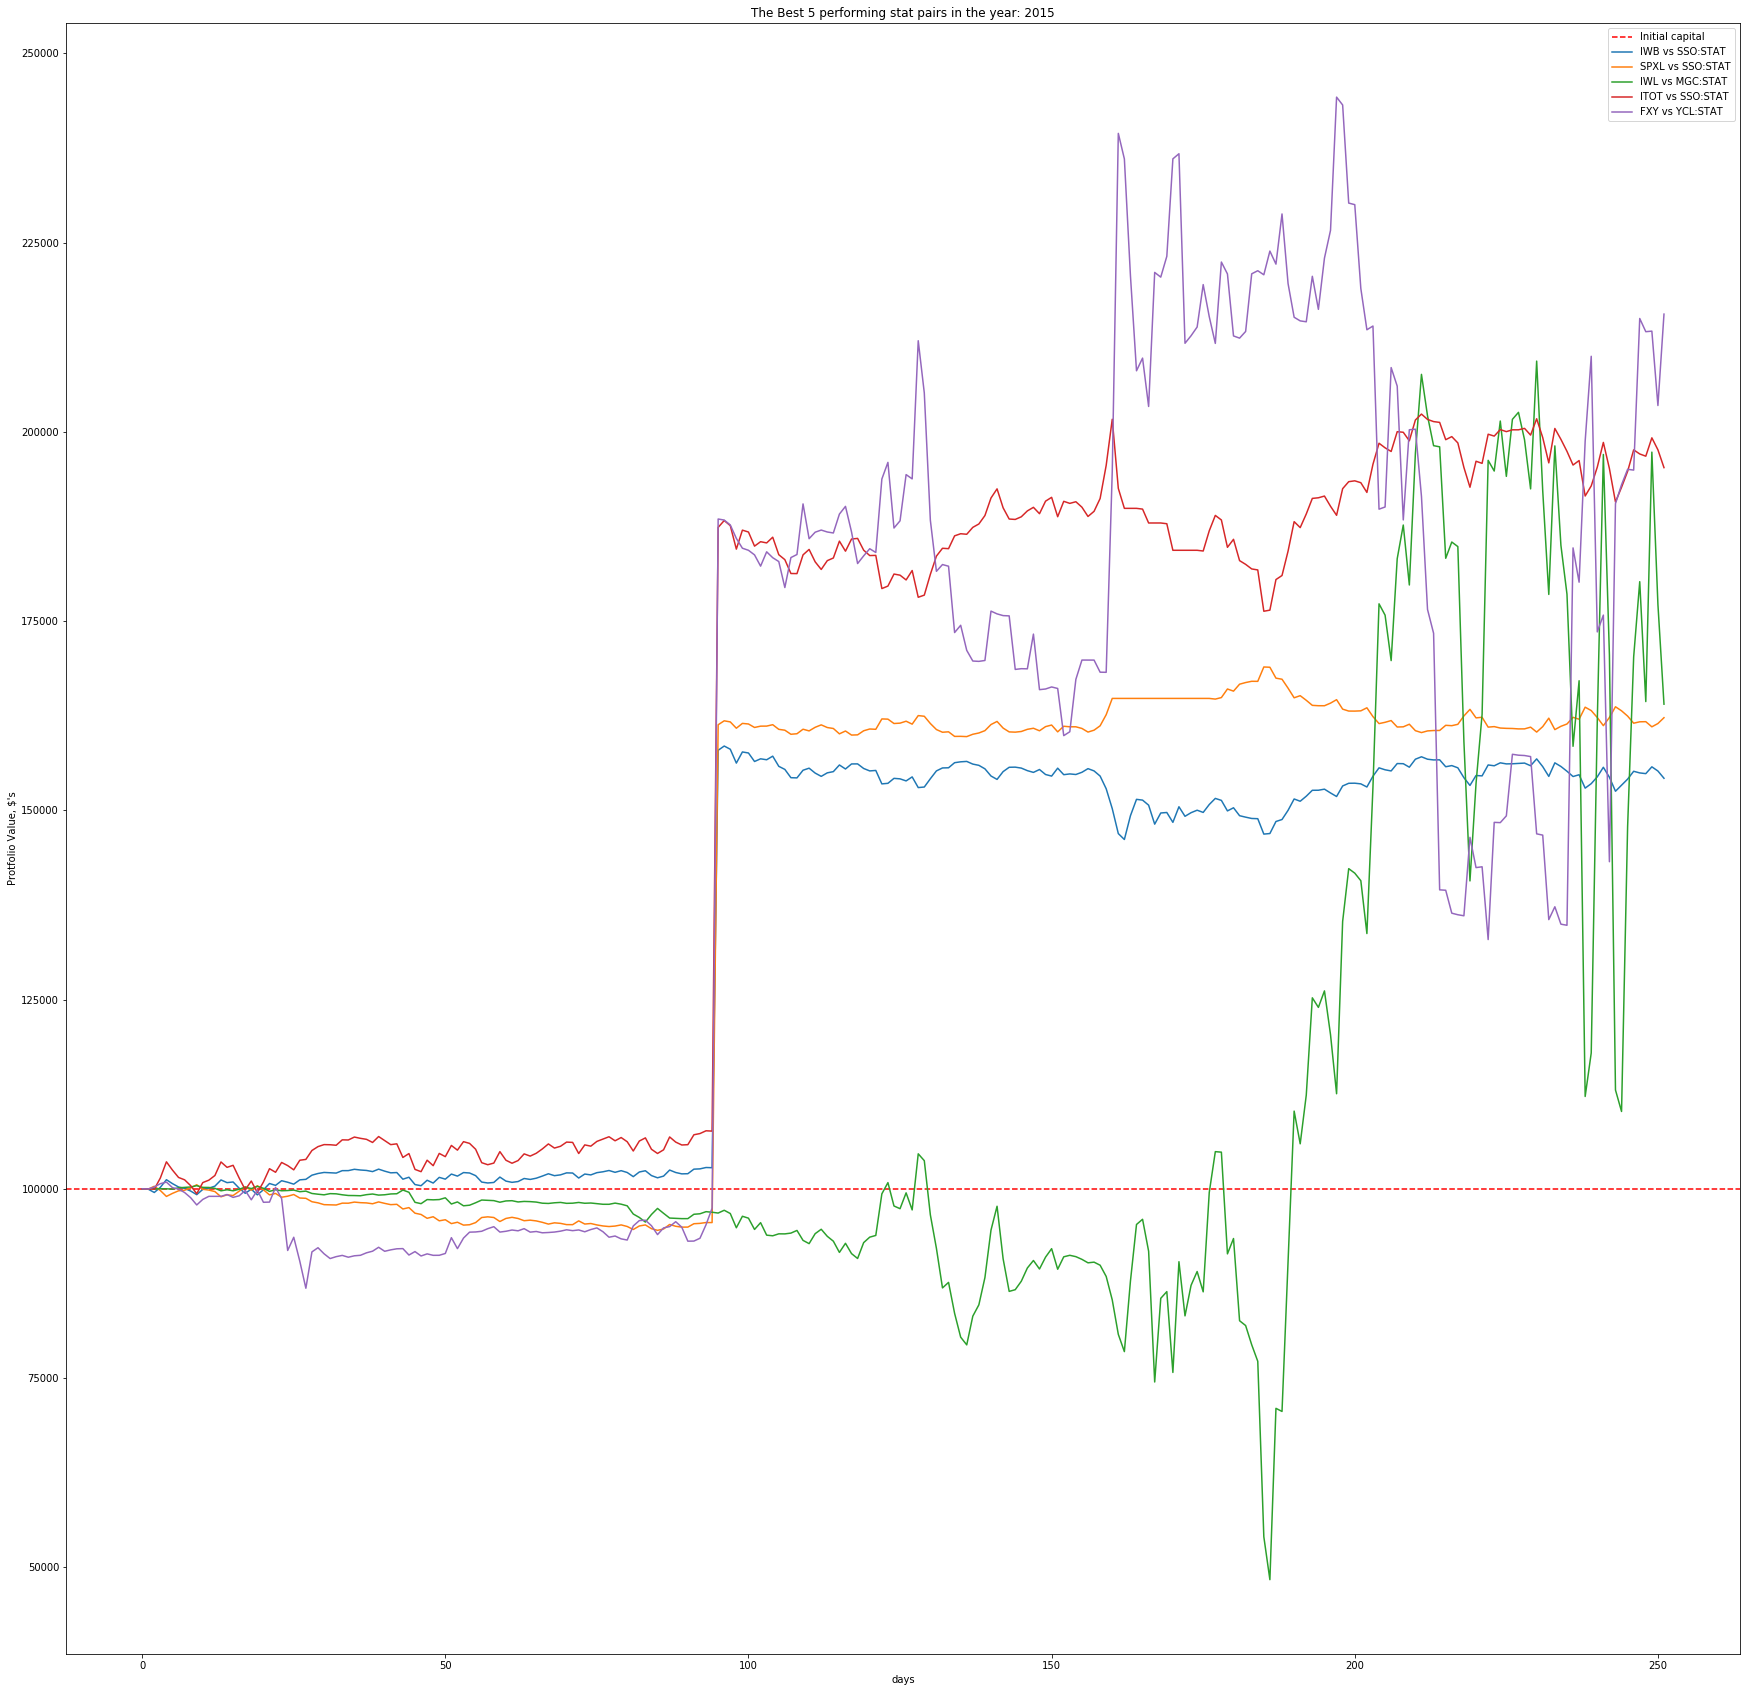

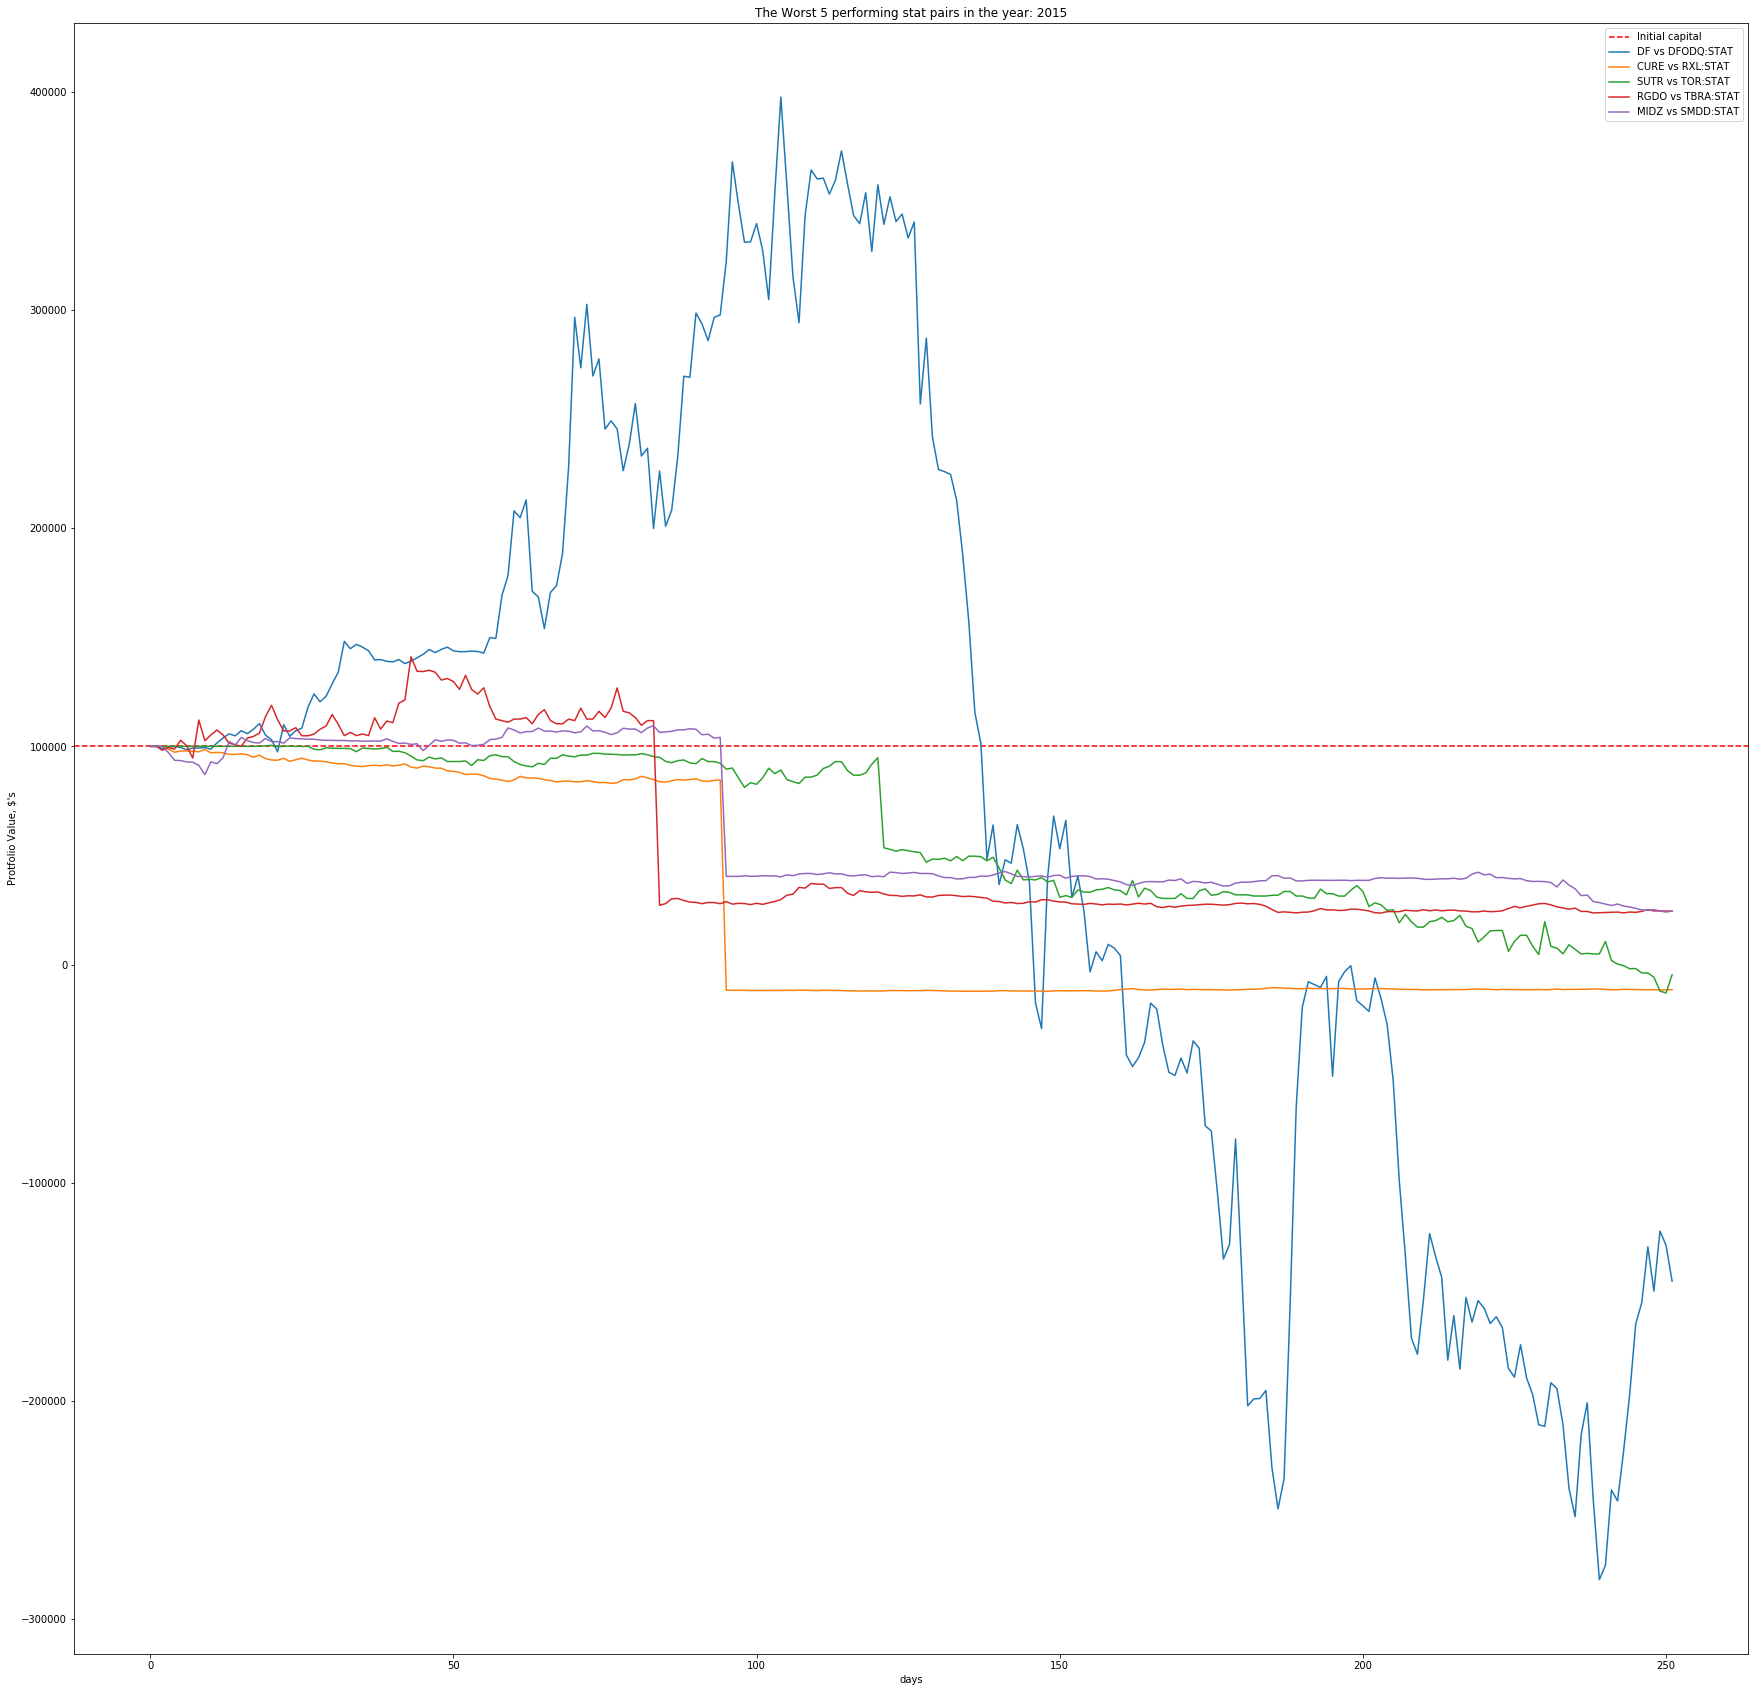

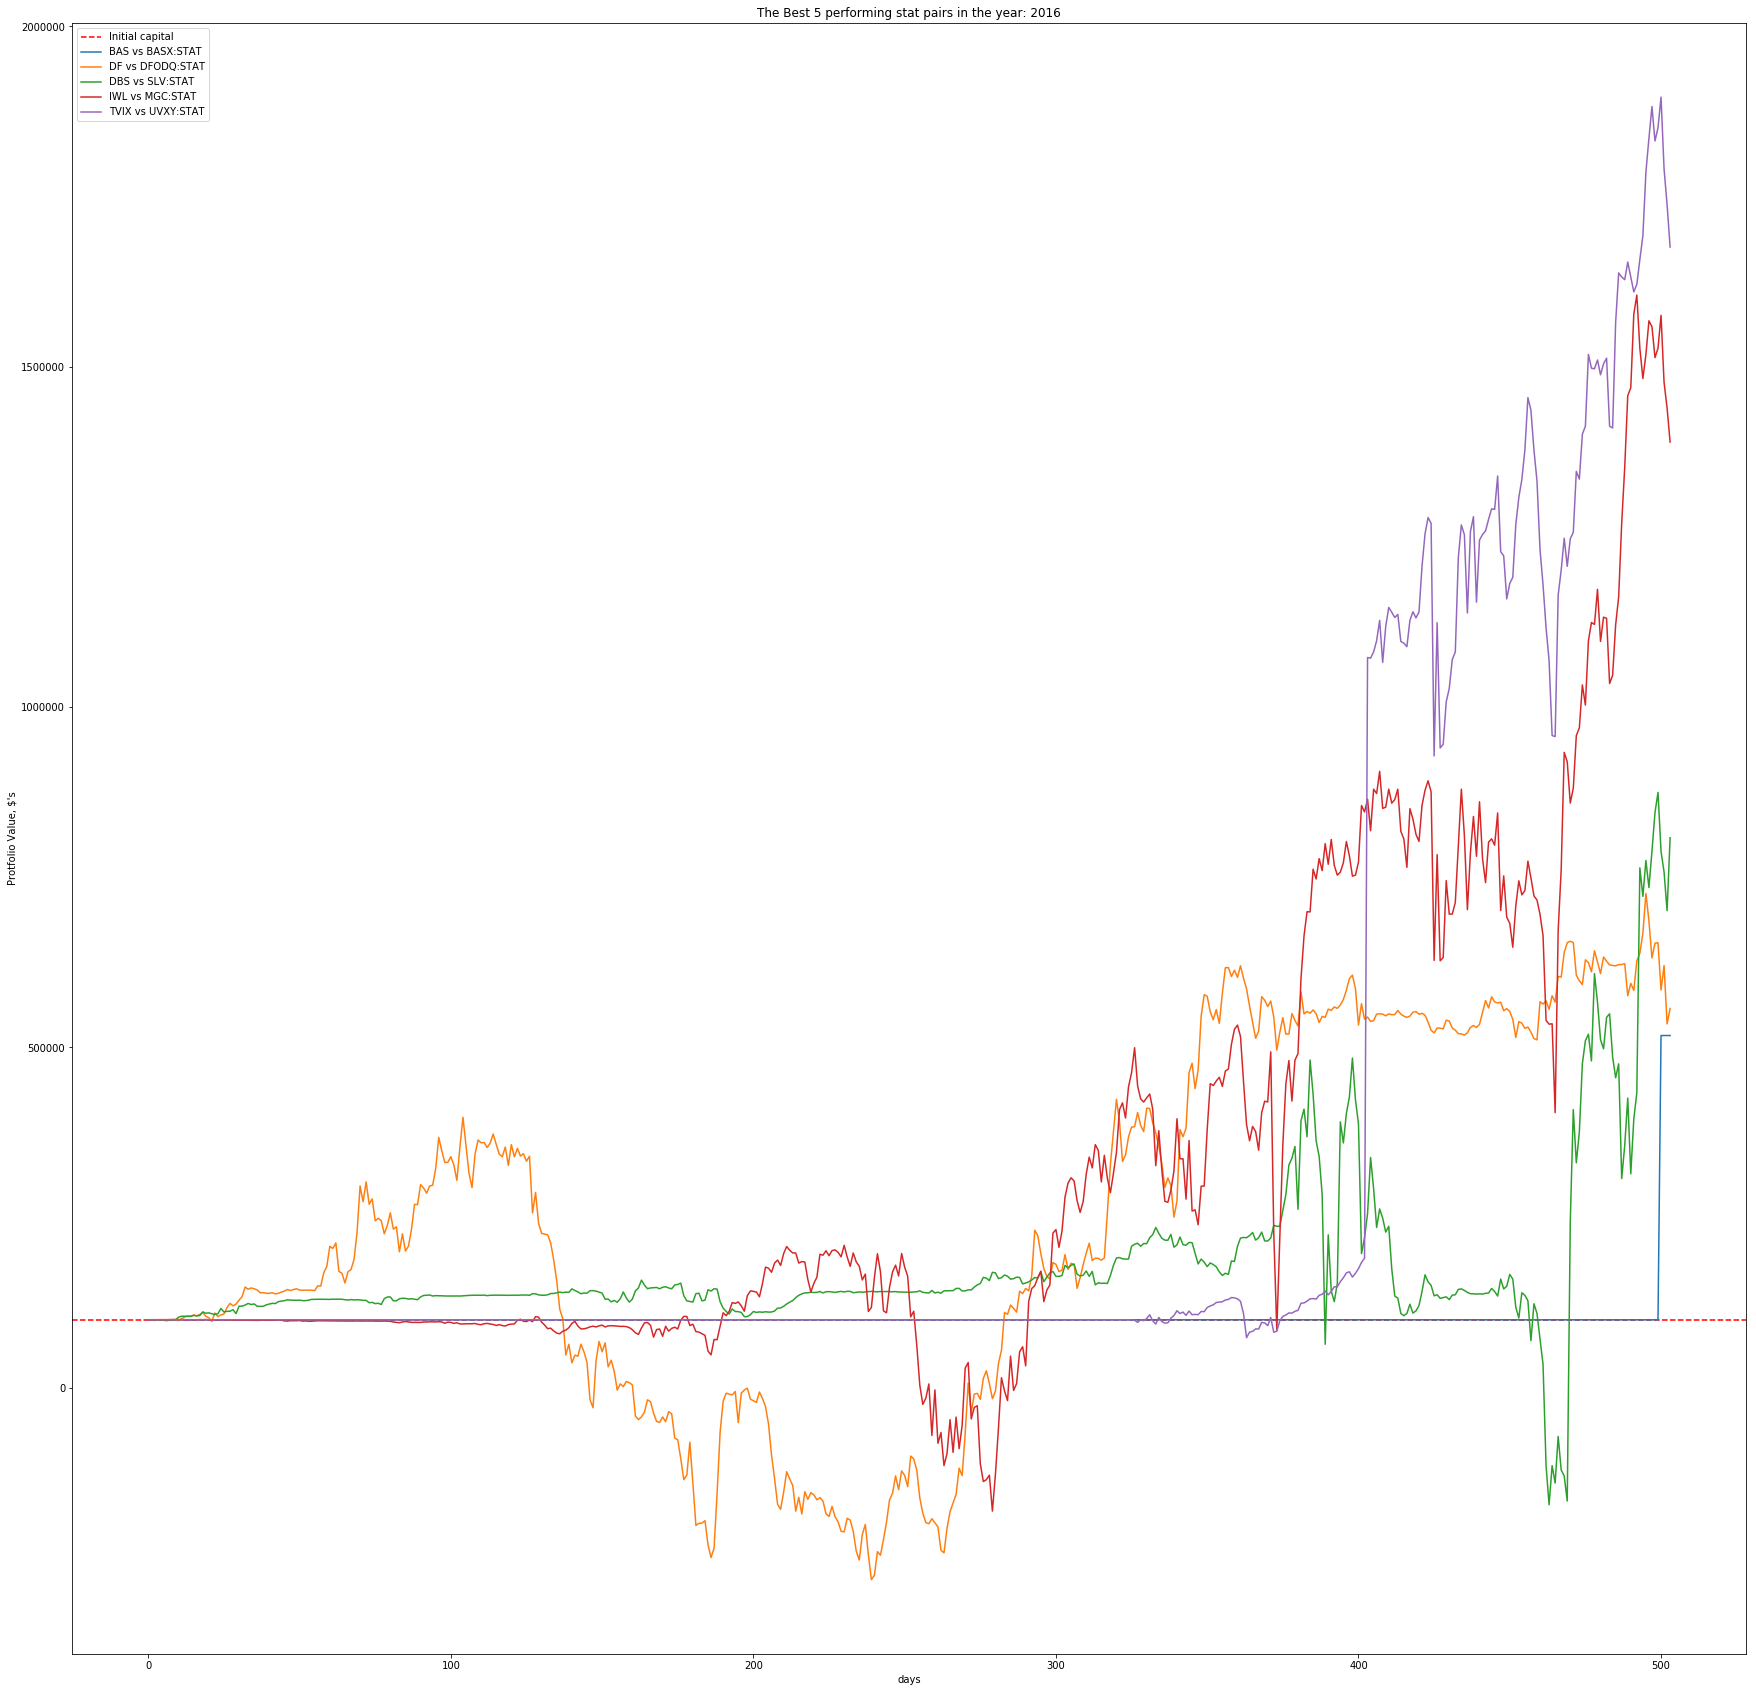

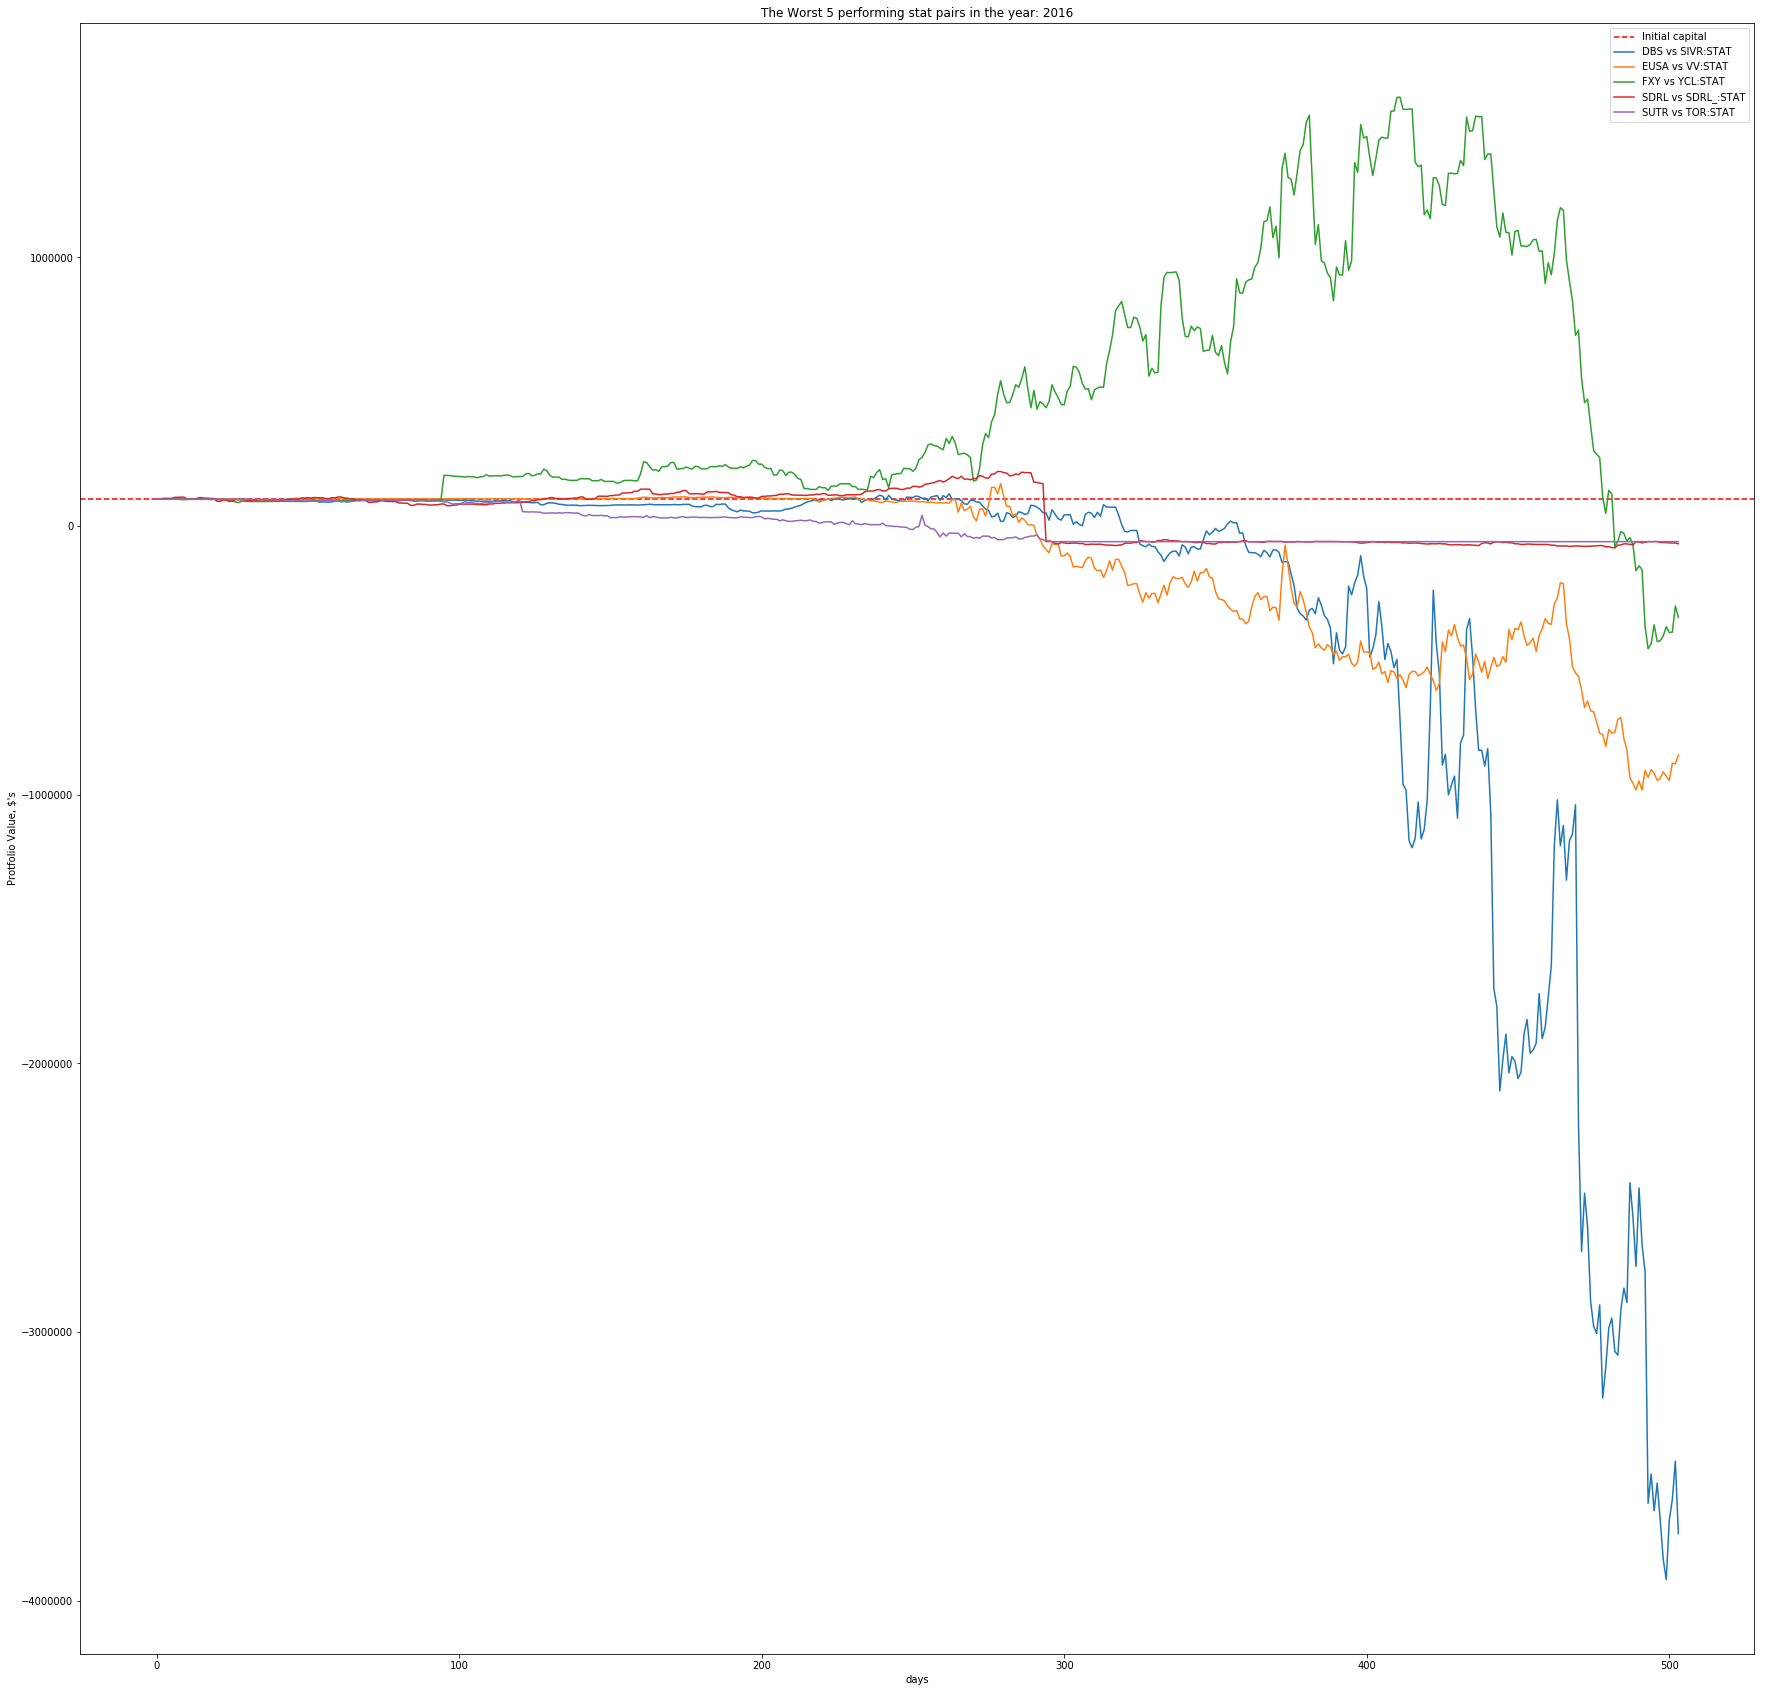

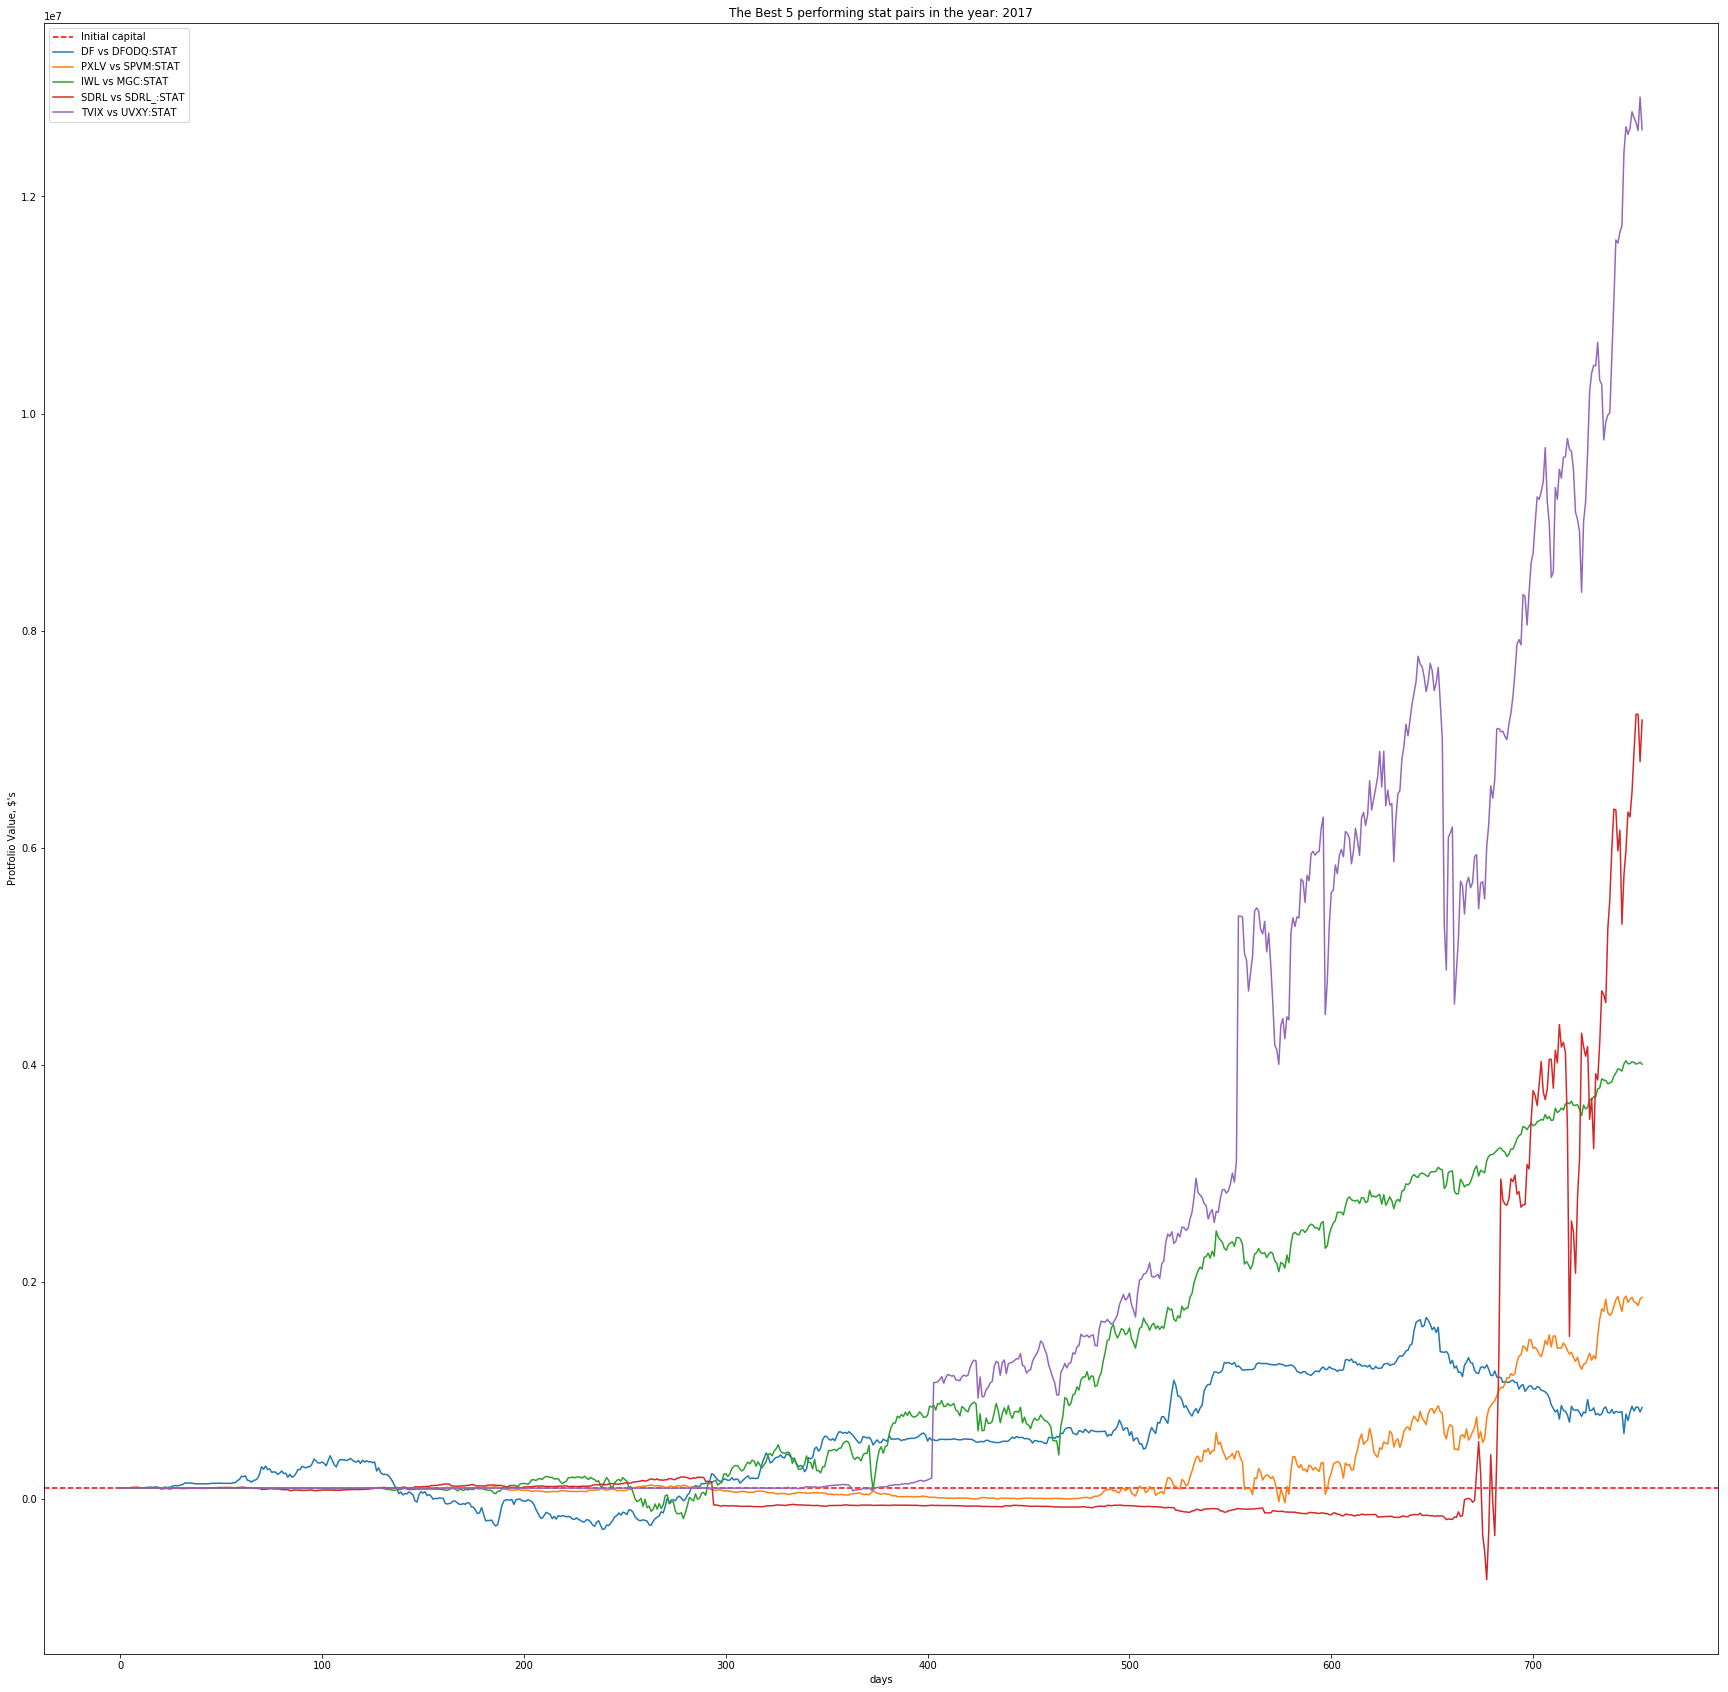

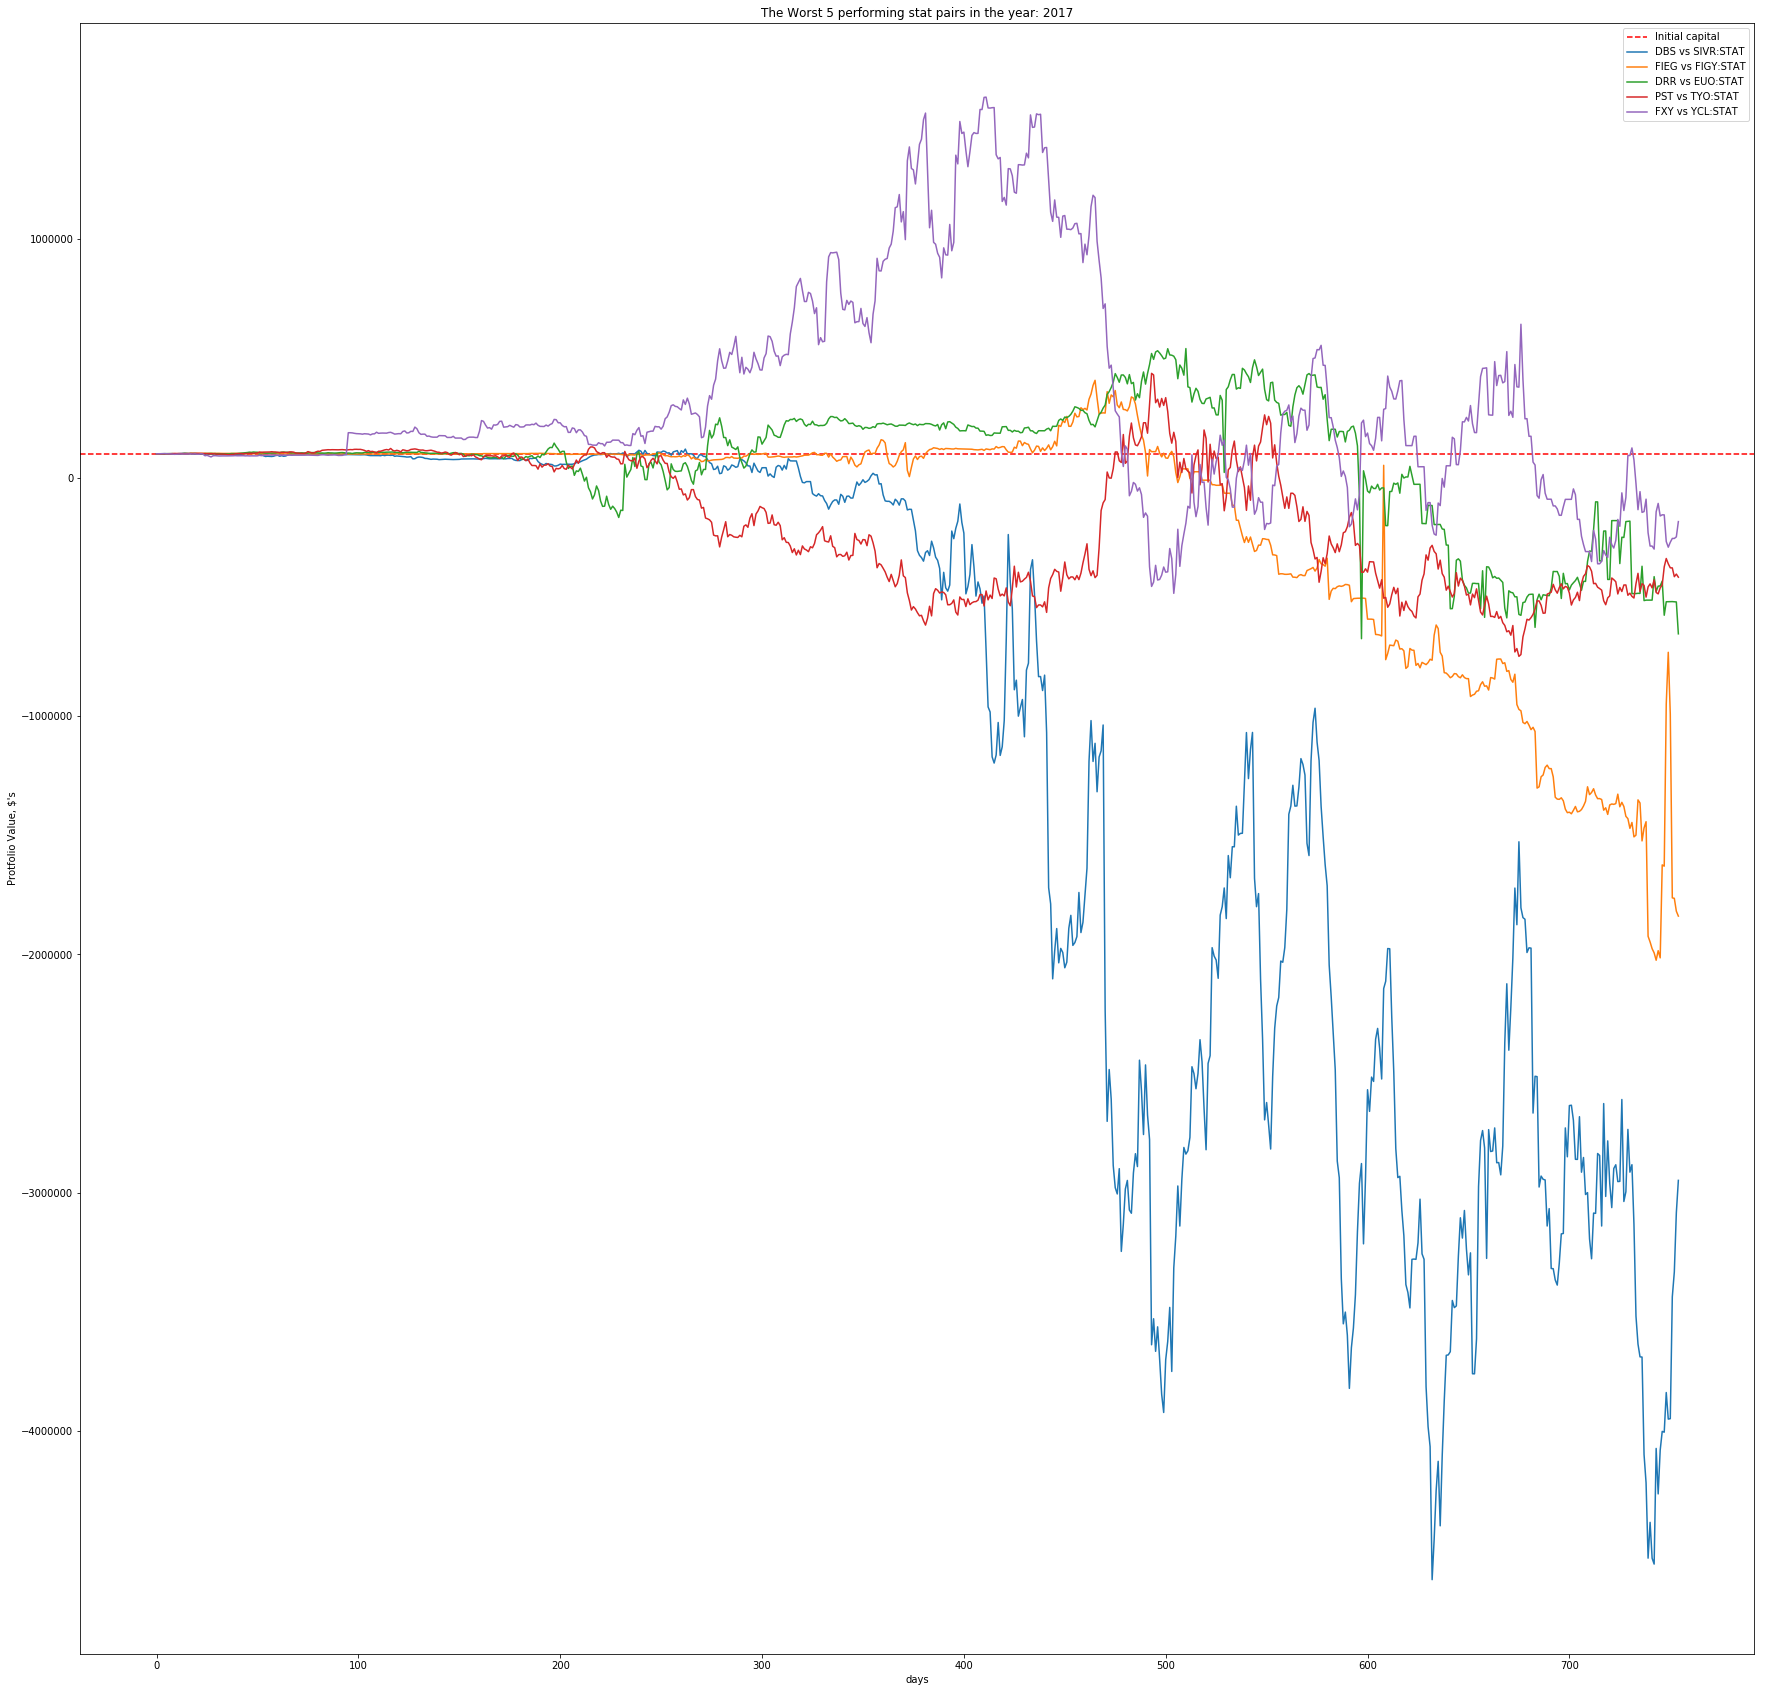

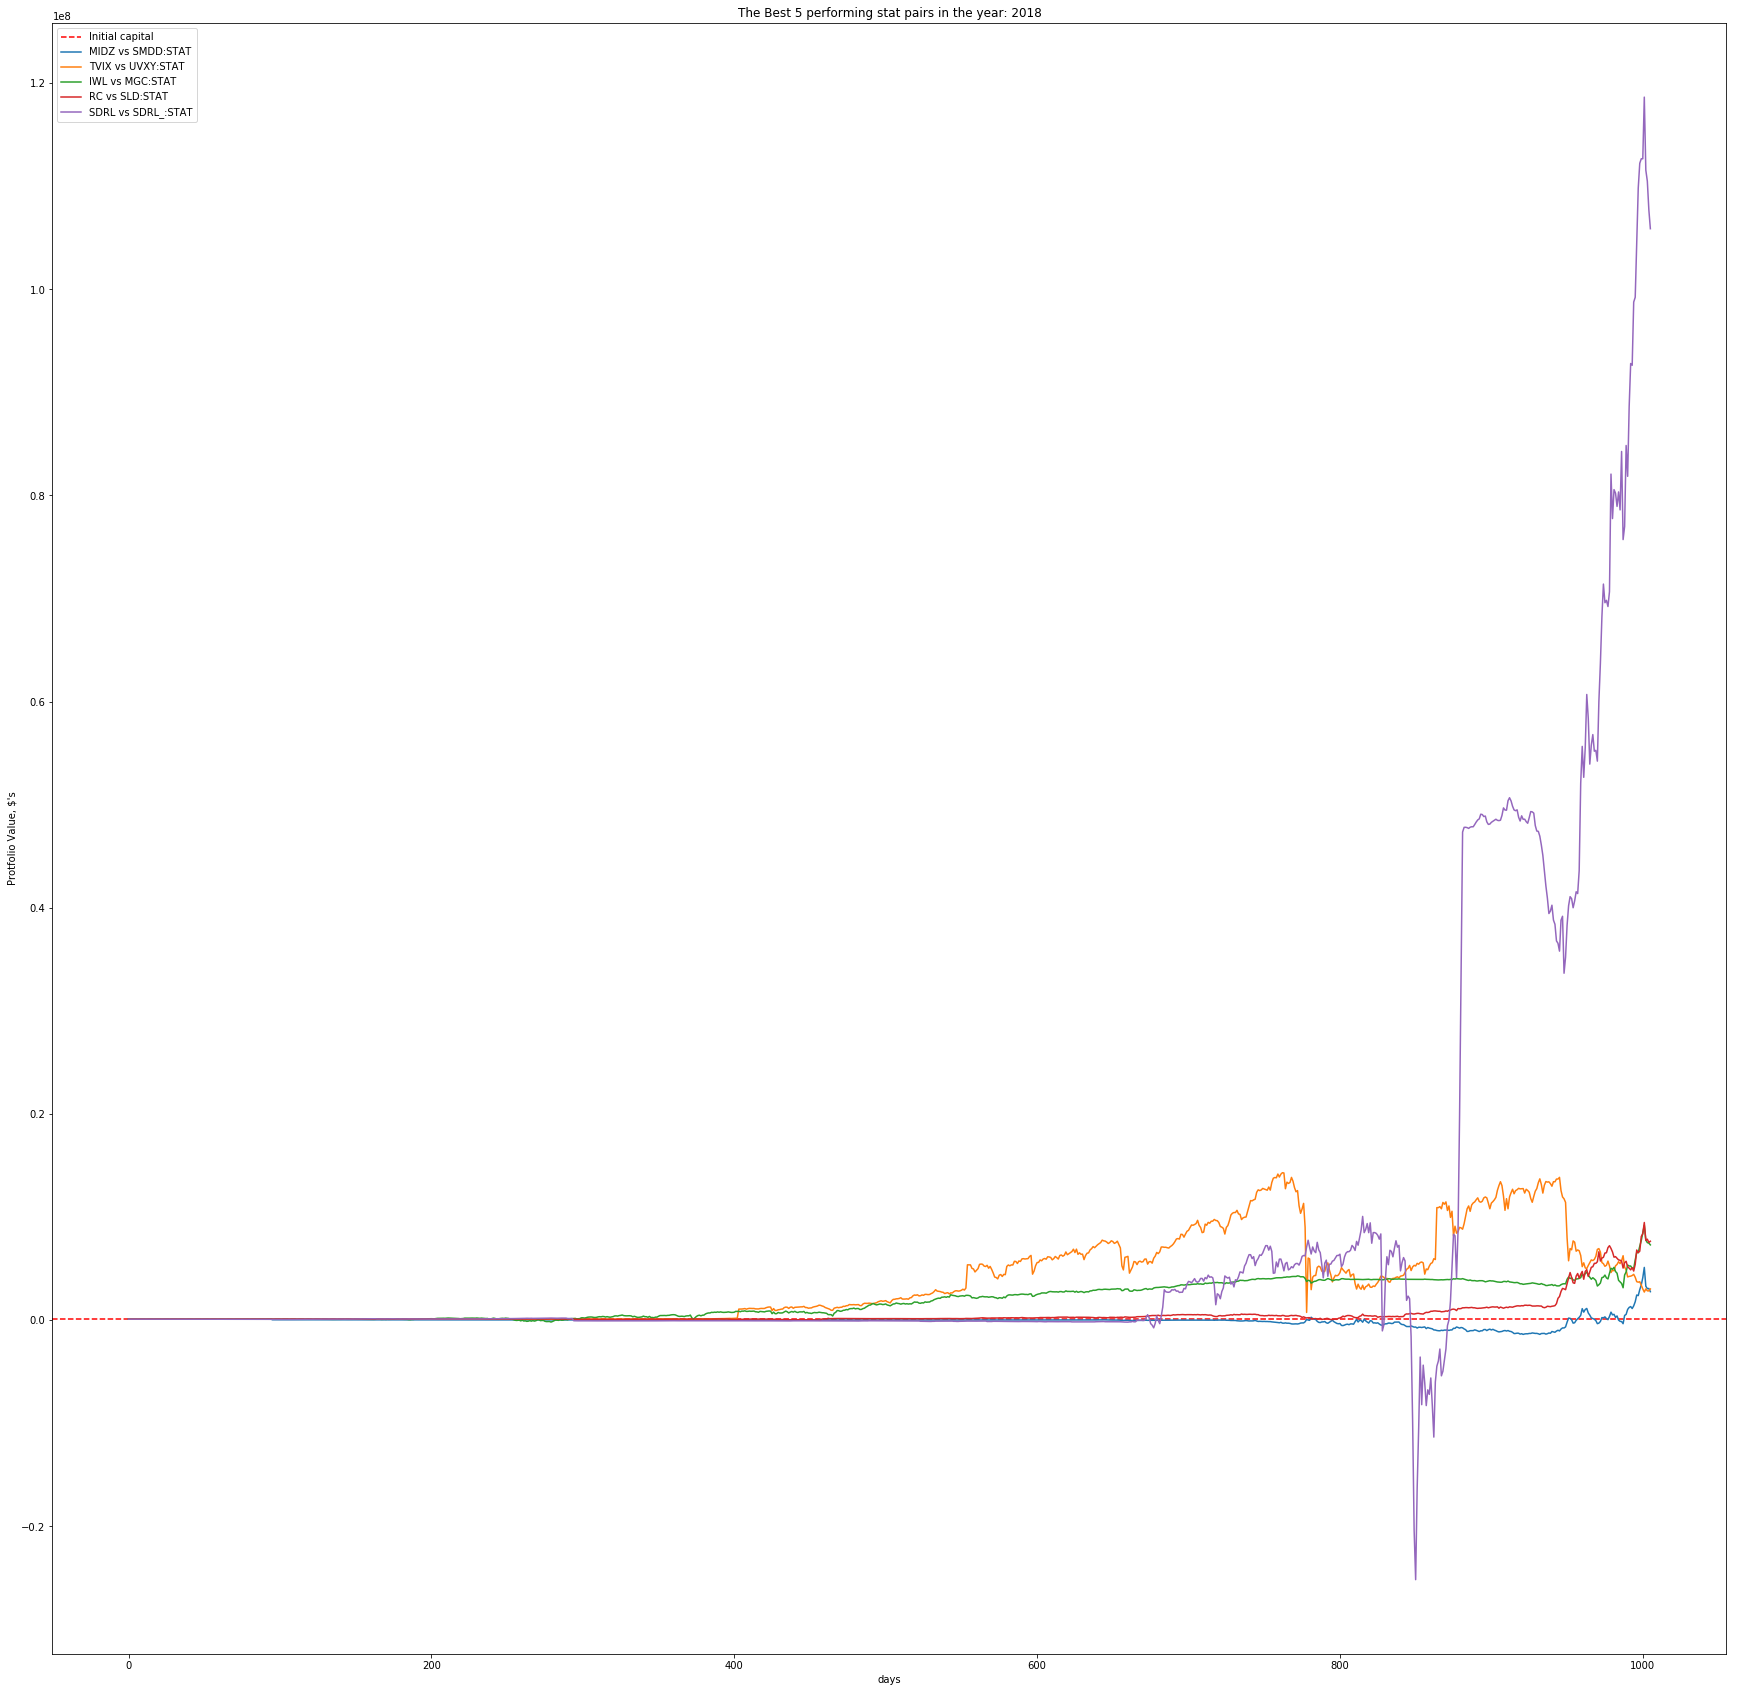

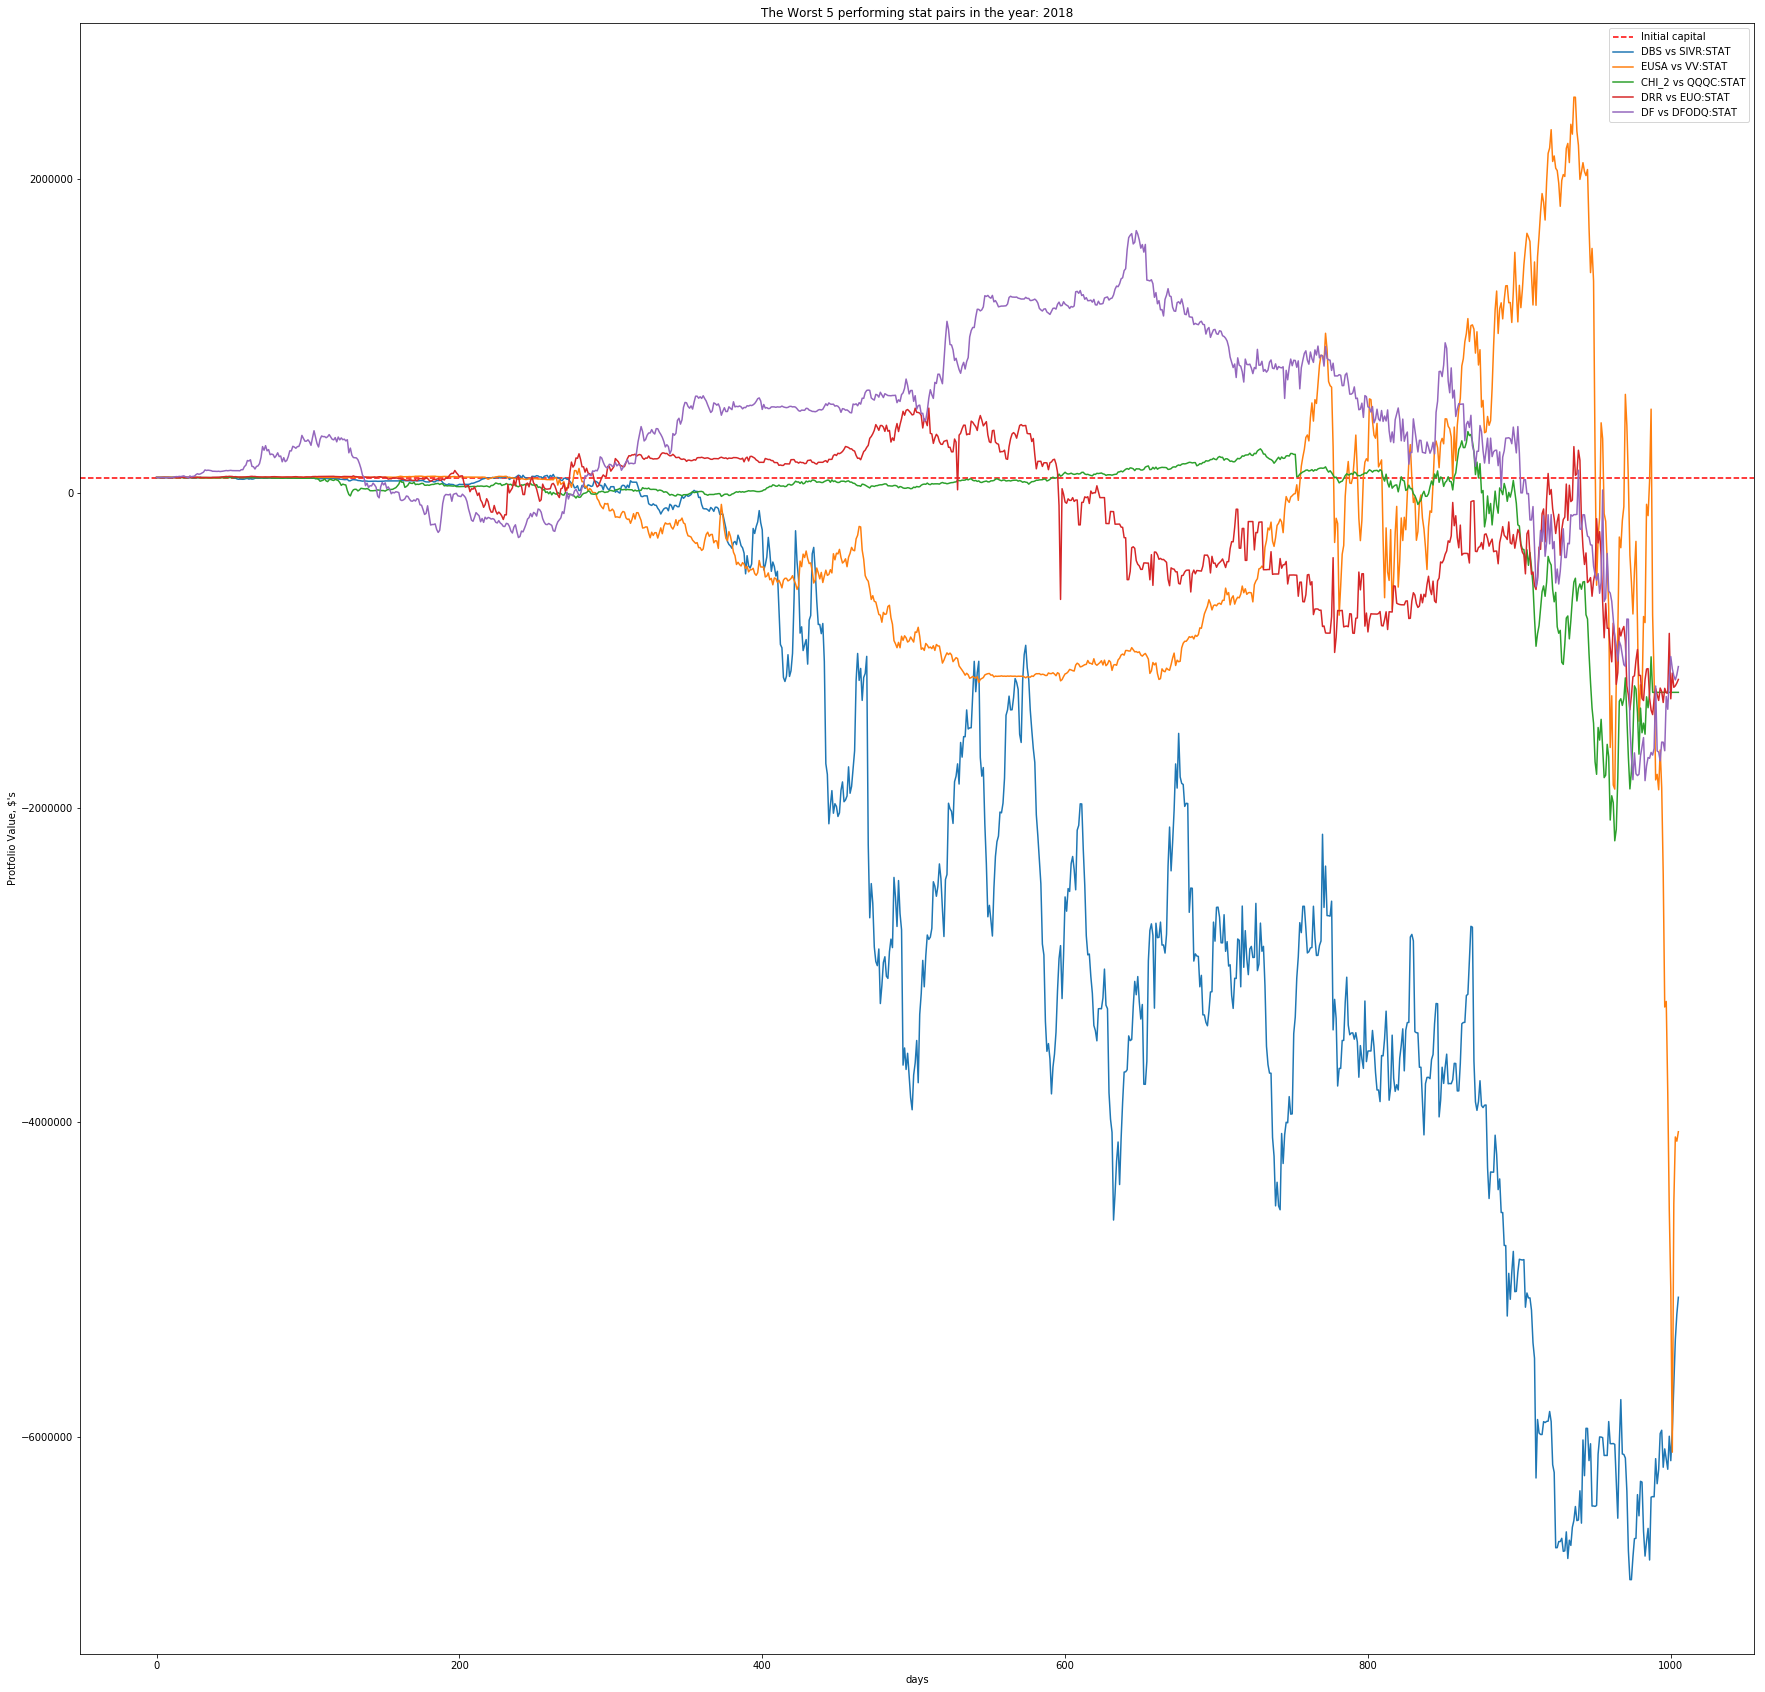

In [9]:
### GETTING STAT AVERAGE RESULTS ### 
stat_average_perf = OrderedDict()
stat_pct_mean = OrderedDict()
stat_pct_std = OrderedDict()
stat_alpha_mean = OrderedDict()
stat_beta_mean = OrderedDict()
stat_sharpe_mean = OrderedDict()
stat_maxdraw_mean = OrderedDict()

best_5_perf_stat = OrderedDict()
worst_5_perf_stat = OrderedDict()

best_5_alpha_stat = OrderedDict()
best_5_beta_stat = OrderedDict()
best_5_sharpe_stat = OrderedDict()
best_5_maxdraw_stat = OrderedDict()

worst_5_alpha_stat = OrderedDict()
worst_5_beta_stat = OrderedDict()
worst_5_sharpe_stat = OrderedDict()
worst_5_maxdraw_stat = OrderedDict()

data_len_stat = len(stat_data)

for year in years:
    stat_average_perf[year] = round(stat_data['perf_' + str(year)].mean(), 2)
    stat_pct_mean[year]     = round(stat_data['pct_' + str(year)].mean(), 2)
    stat_pct_std[year]      = round(stat_data['pct_'+str(year)].std(), 2)
    stat_alpha_mean[year]   = round(stat_data['alpha_' + str(year)].mean(), 2)
    stat_beta_mean[year]    = round(stat_data['beta_' + str(year)].mean(), 2)
    stat_sharpe_mean[year]  = round(stat_data['sharpe_' + str(year)].mean(), 2)
    stat_maxdraw_mean[year] = round(stat_data['maxdraw_'+str(year)].mean(), 2)
    
    d = pd.read_csv(file_data + '/pair_sim_' + str(year)+'.csv')
    best_idx = [stat_data['perf_'+str(year)].sort_values()[data_len_stat-5:data_len_stat].index[i] for i in range(5)]
    worst_idx = [stat_data['perf_'+str(year)].sort_values()[:5].index[i] for i in range(5)]
    
    best_5_perf_stat[year] = [(best_idx[i], d[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_perf_stat[year] = [(worst_idx[i], d[worst_idx[i]]) for i in range(len(worst_idx))]
    
    best_5_alpha_stat[year] = [(best_idx[i], stat_data['alpha_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_alpha_stat[year] = [(worst_idx[i], stat_data['alpha_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]
    
    best_5_beta_stat[year] = [(best_idx[i], stat_data['beta_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_beta_stat[year] = [(worst_idx[i], stat_data['beta_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]

    best_5_sharpe_stat[year] = [(best_idx[i], stat_data['sharpe_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_sharpe_stat[year] = [(worst_idx[i], stat_data['sharpe_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]
     
    best_5_maxdraw_stat[year] = [(best_idx[i], stat_data['maxdraw_'+str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_maxdraw_stat[year] = [(worst_idx[i], stat_data['maxdraw_'+str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]

colnames = ['average portfolio value', 'average percentage change', 'average standard deviation',
            'average alpha', 'average beta', 'average sharpe ratio', 'average max drawdown']

list_of_dicts = [stat_average_perf,stat_pct_mean, stat_pct_std,
                 stat_alpha_mean, stat_beta_mean,stat_sharpe_mean, stat_maxdraw_mean ]

main_df = pd.DataFrame()
main_df['year'] = pd.Series(years)

for i in range(len(list_of_dicts)):
    df = pd.DataFrame(data=list(list_of_dicts[i].items()) , columns=['year', colnames[i]] )
    main_df = pd.concat([main_df, df[colnames[i]]], axis=1)
main_df.to_latex(buf=file_data+'stat-perf.txt', index=True)
    

for year in years:
    fig, ax = plt.subplots(figsize = (30, 30))
    ax.set_ylabel("Protfolio Value, $'s")
    ax.set_xlabel('days')
    plt.axhline(100000, color='red', ls='--', label='Initial capital')
    plt.title('The Best 5 performing stat pairs in the year: {}'.format(year))
    
    for i in range(len(best_5_perf_stat[year])):
        ax.plot(best_5_perf_stat[year][i][1])
    plt.legend(loc='best')
    plt.savefig(fname=file_data + 'PLOTS/STAT/best_5_stat_year_' + str(year) + '.png')
    plt.show()
    
    fig1, ax1 = plt.subplots(figsize = (30, 30))
    ax1.set_ylabel("Protfolio Value, $'s")
    ax1.set_xlabel('days')
    plt.axhline(100000, color='red', ls='--', label='Initial capital')    
    for i in range(len(worst_5_perf_stat[year])):
        ax1.plot(worst_5_perf_stat[year][i][1])
        plt.title('The Worst 5 performing stat pairs in the year: {}'.format(year))
    plt.legend(loc='best')
    plt.savefig(fname=file_data + 'PLOTS/STAT/worst_5_stat_year_' + str(year) + '.png')
    plt.show() 

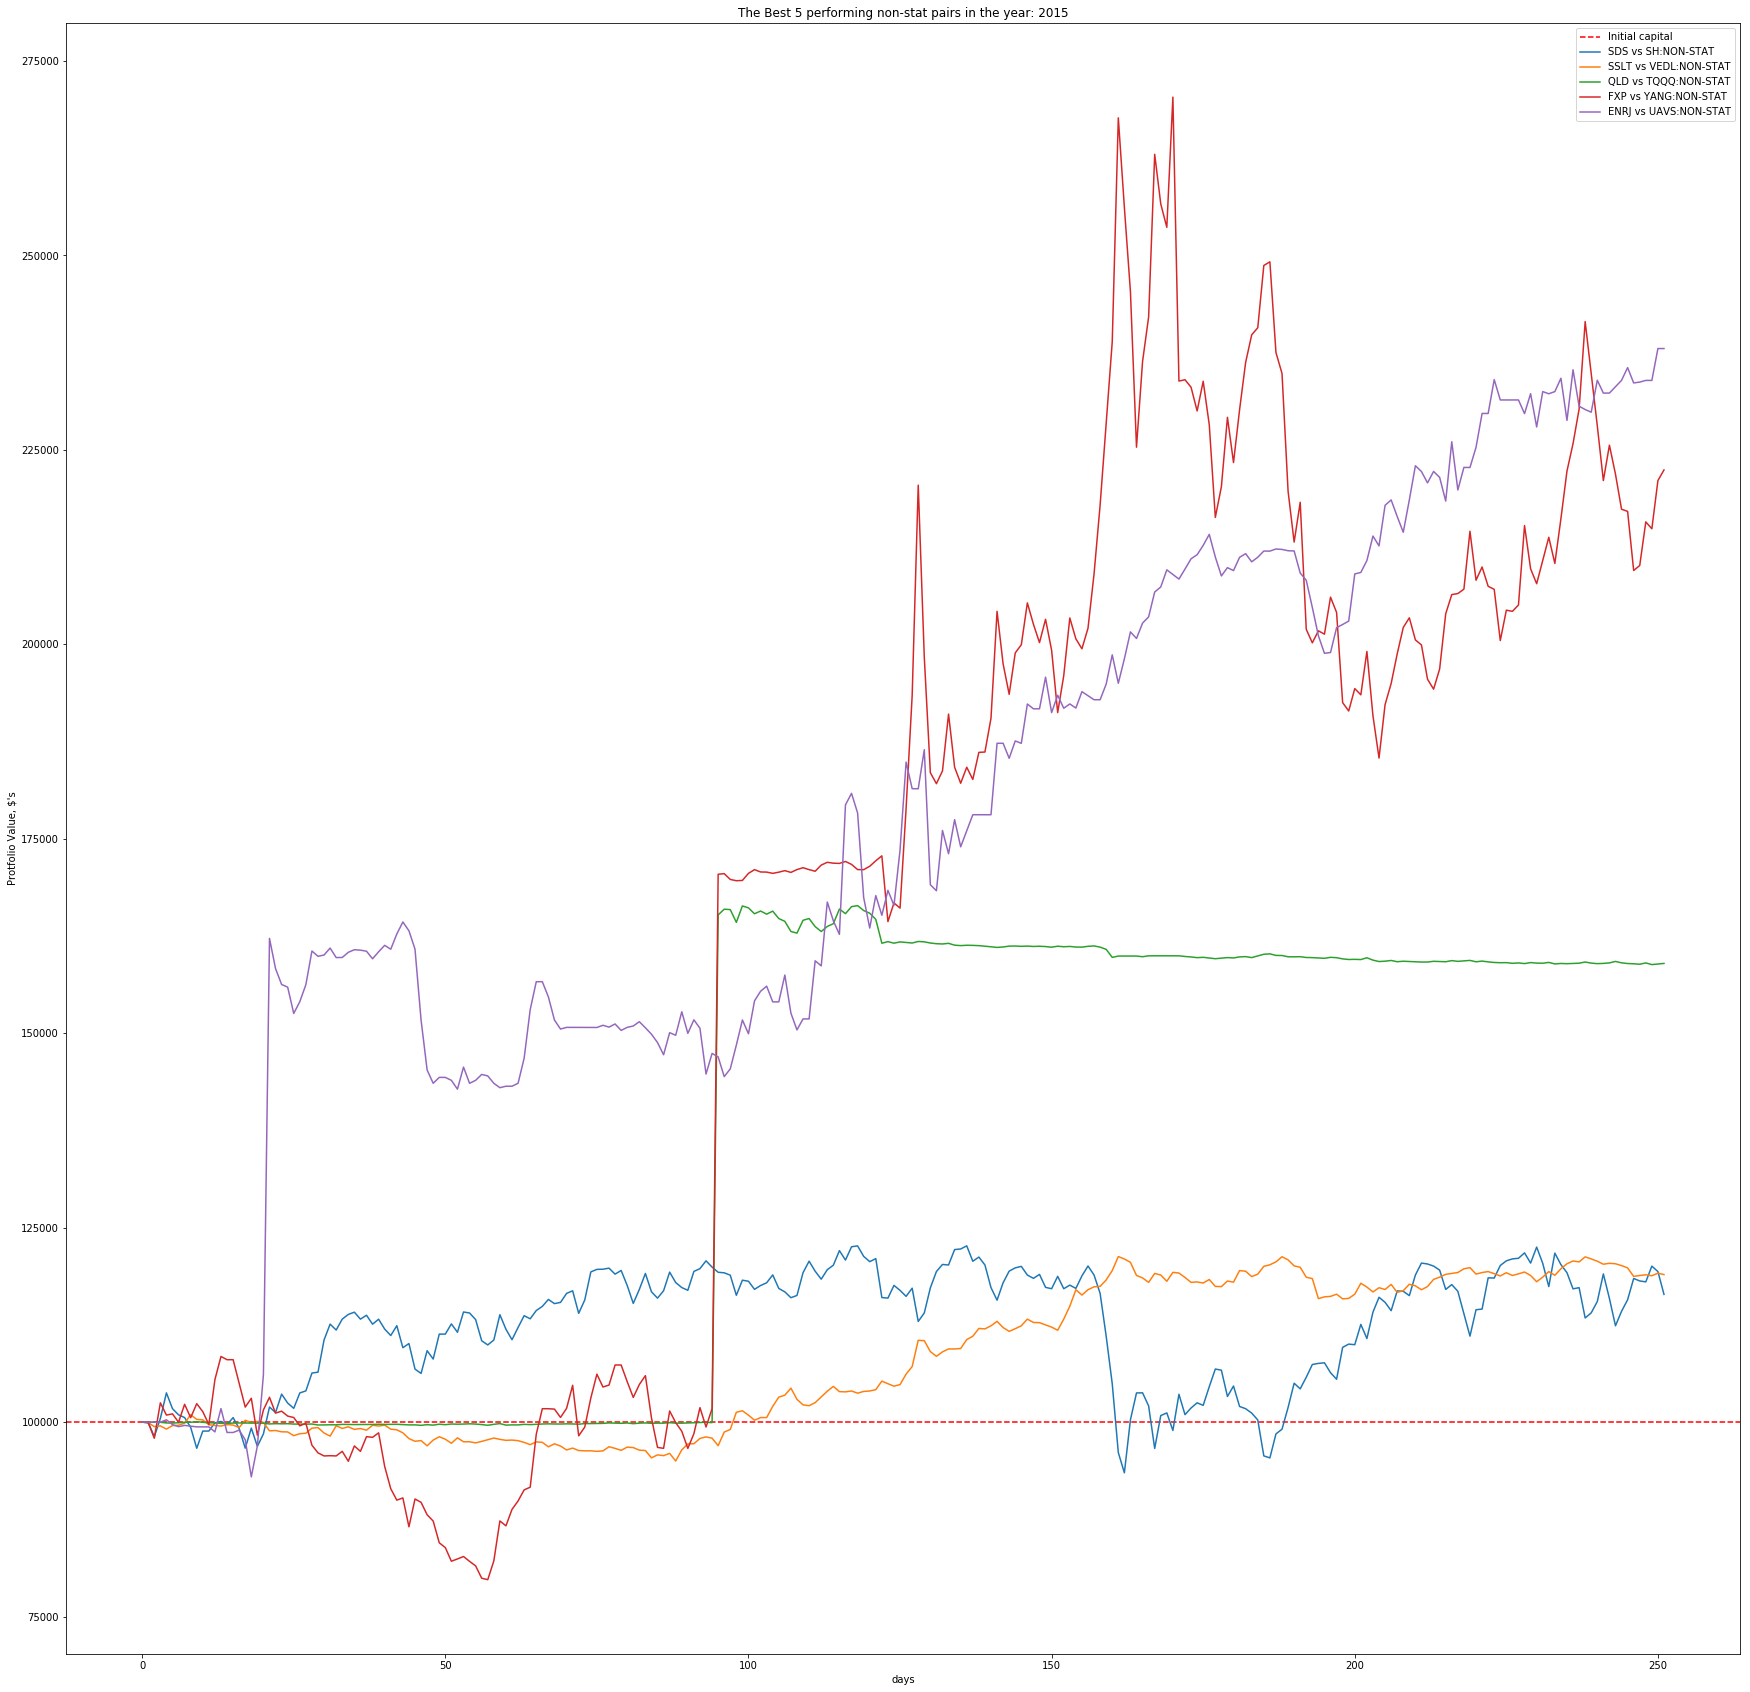

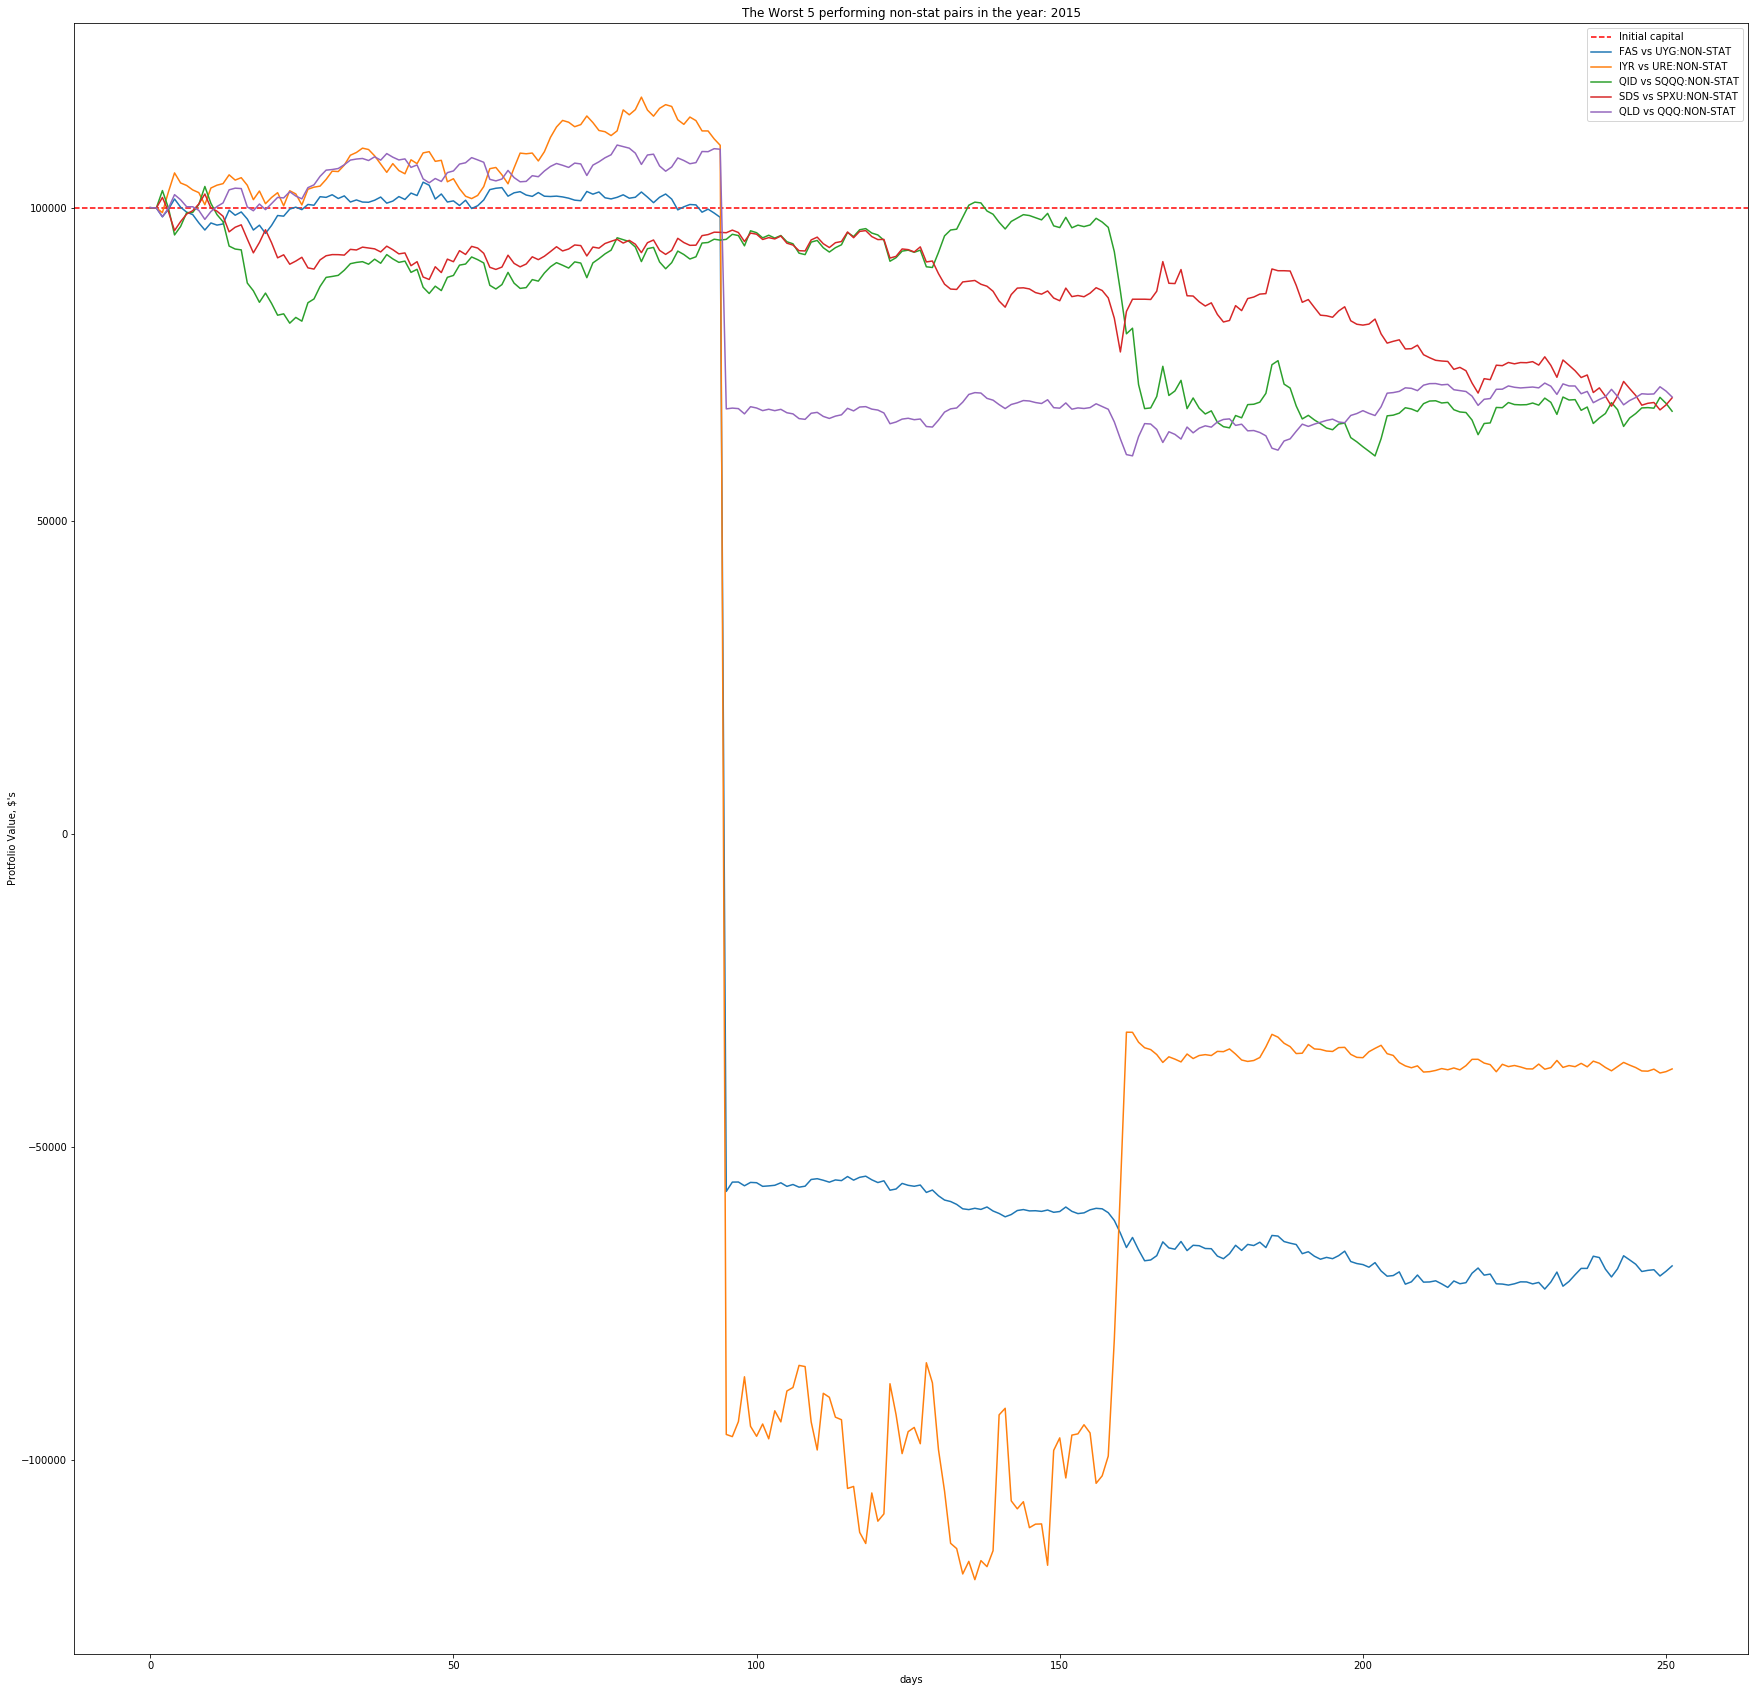

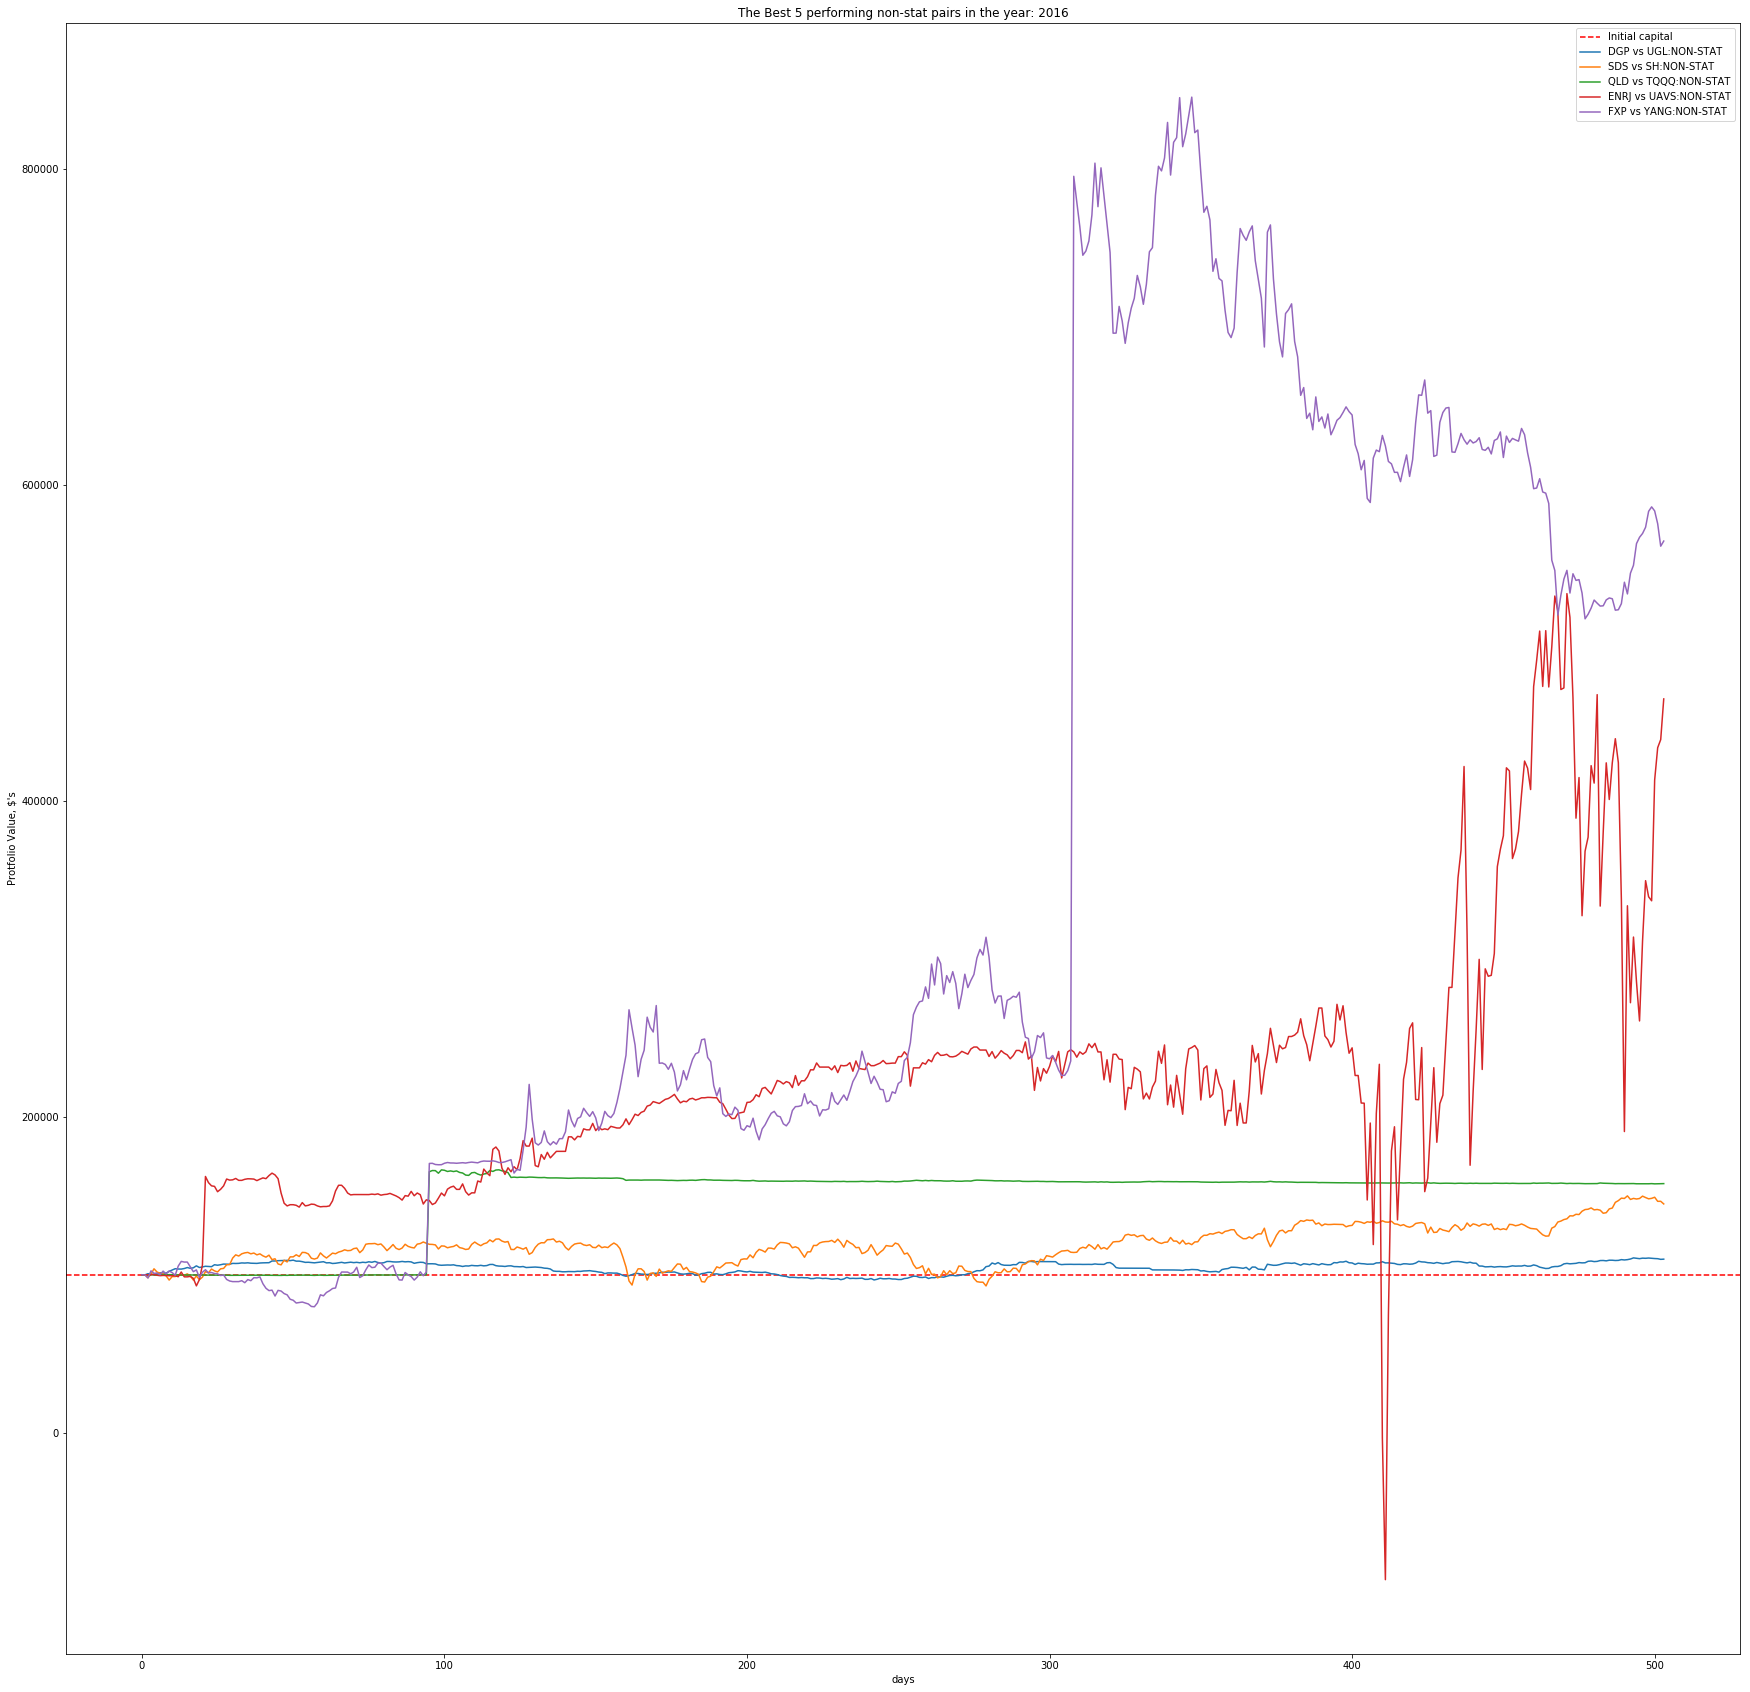

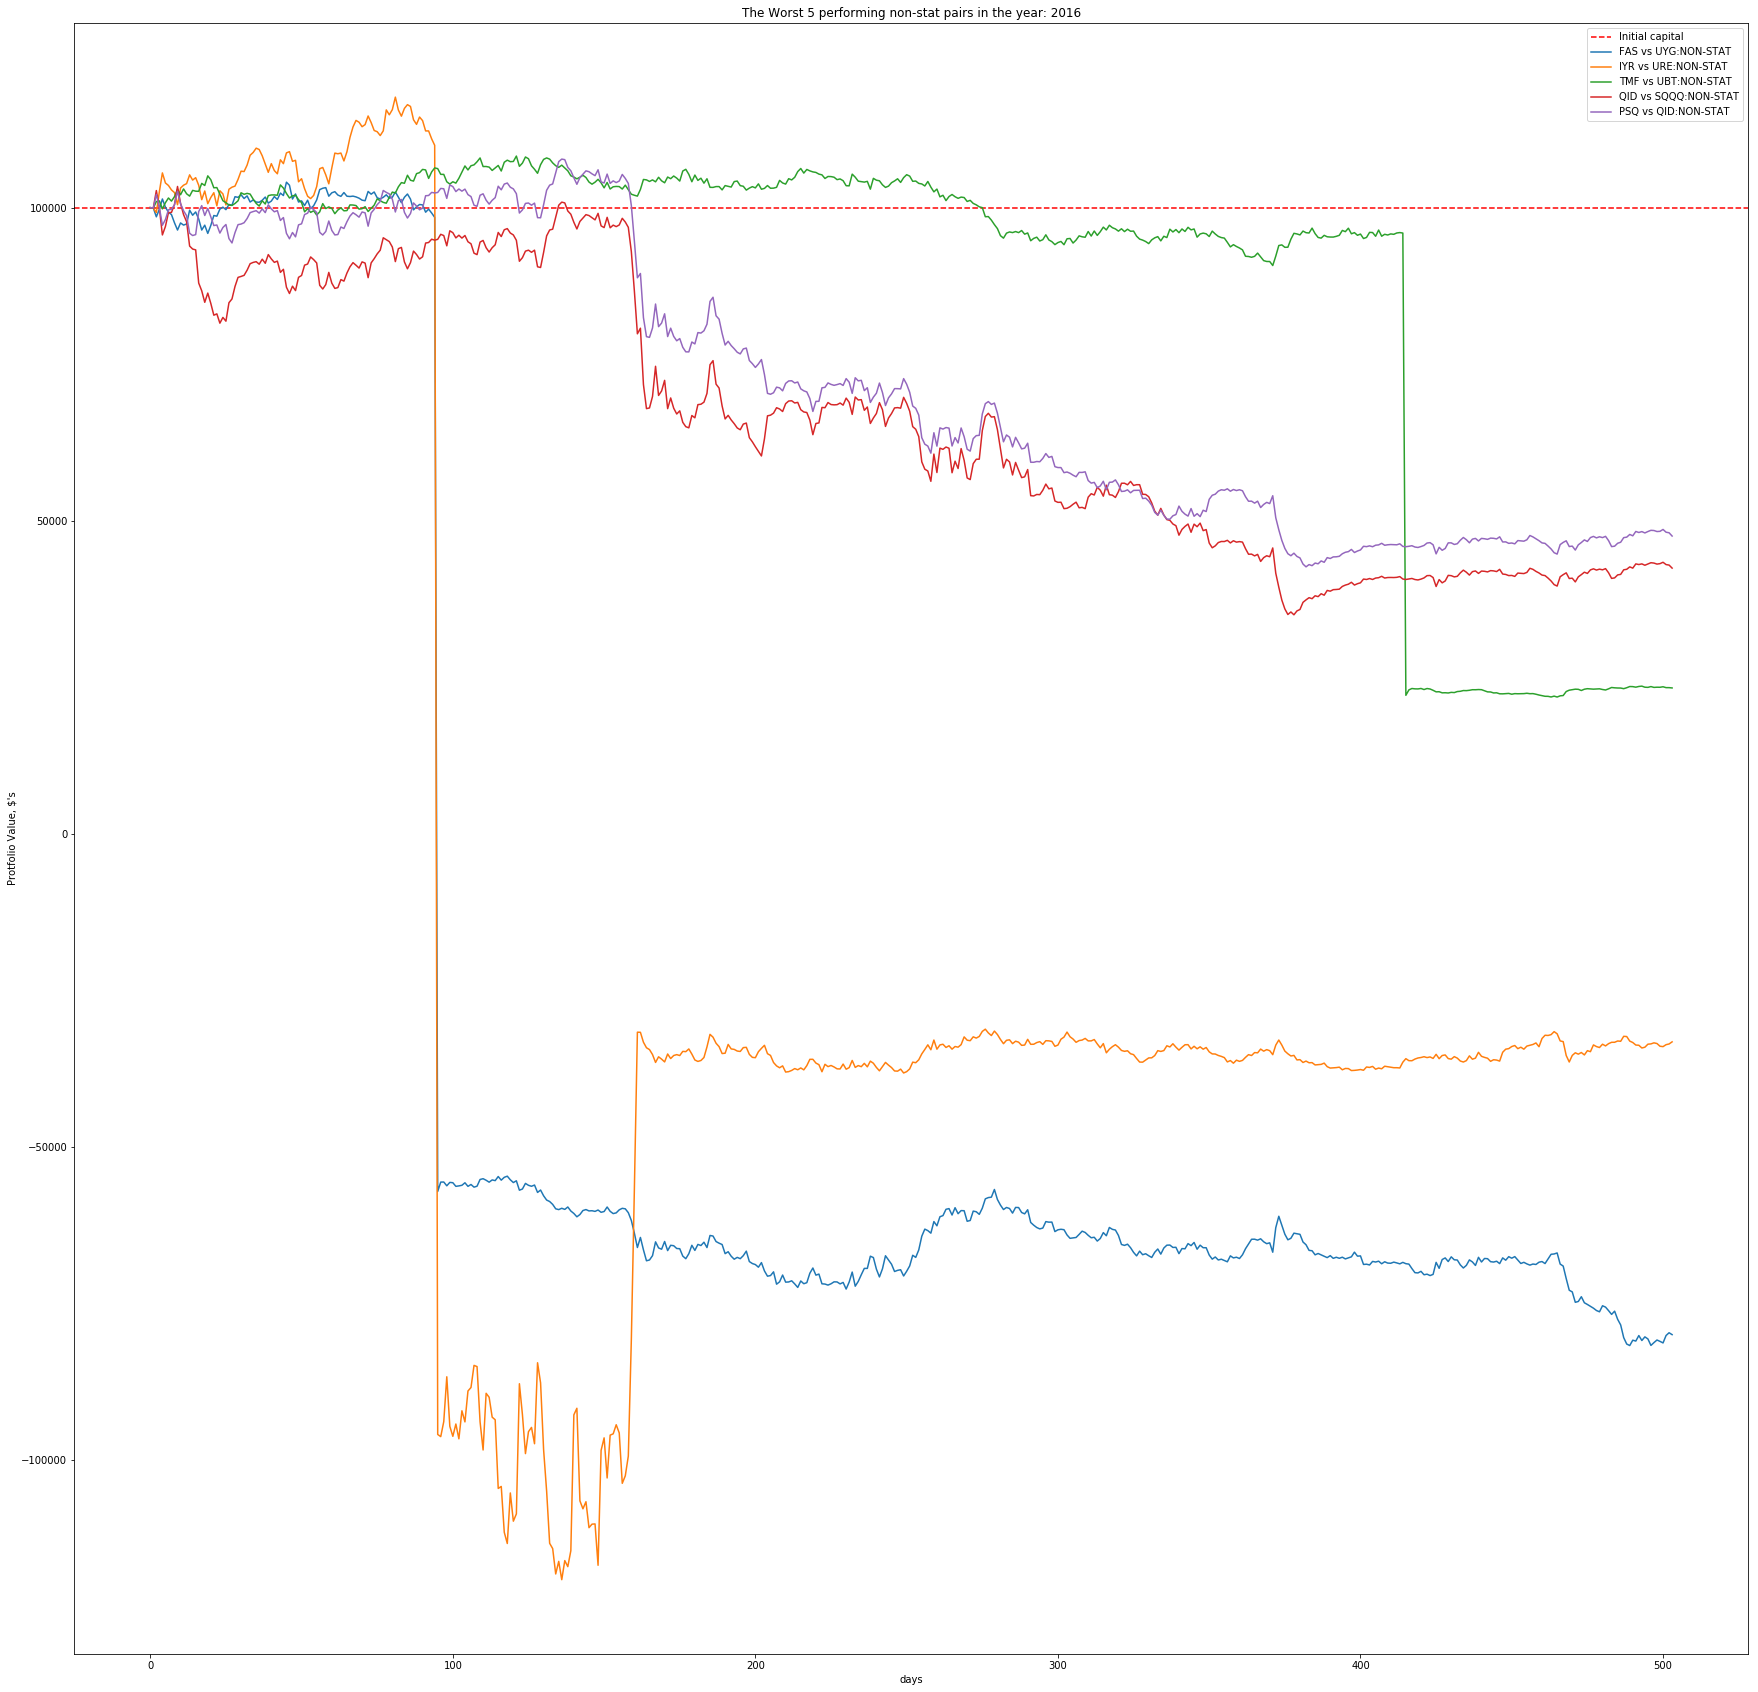

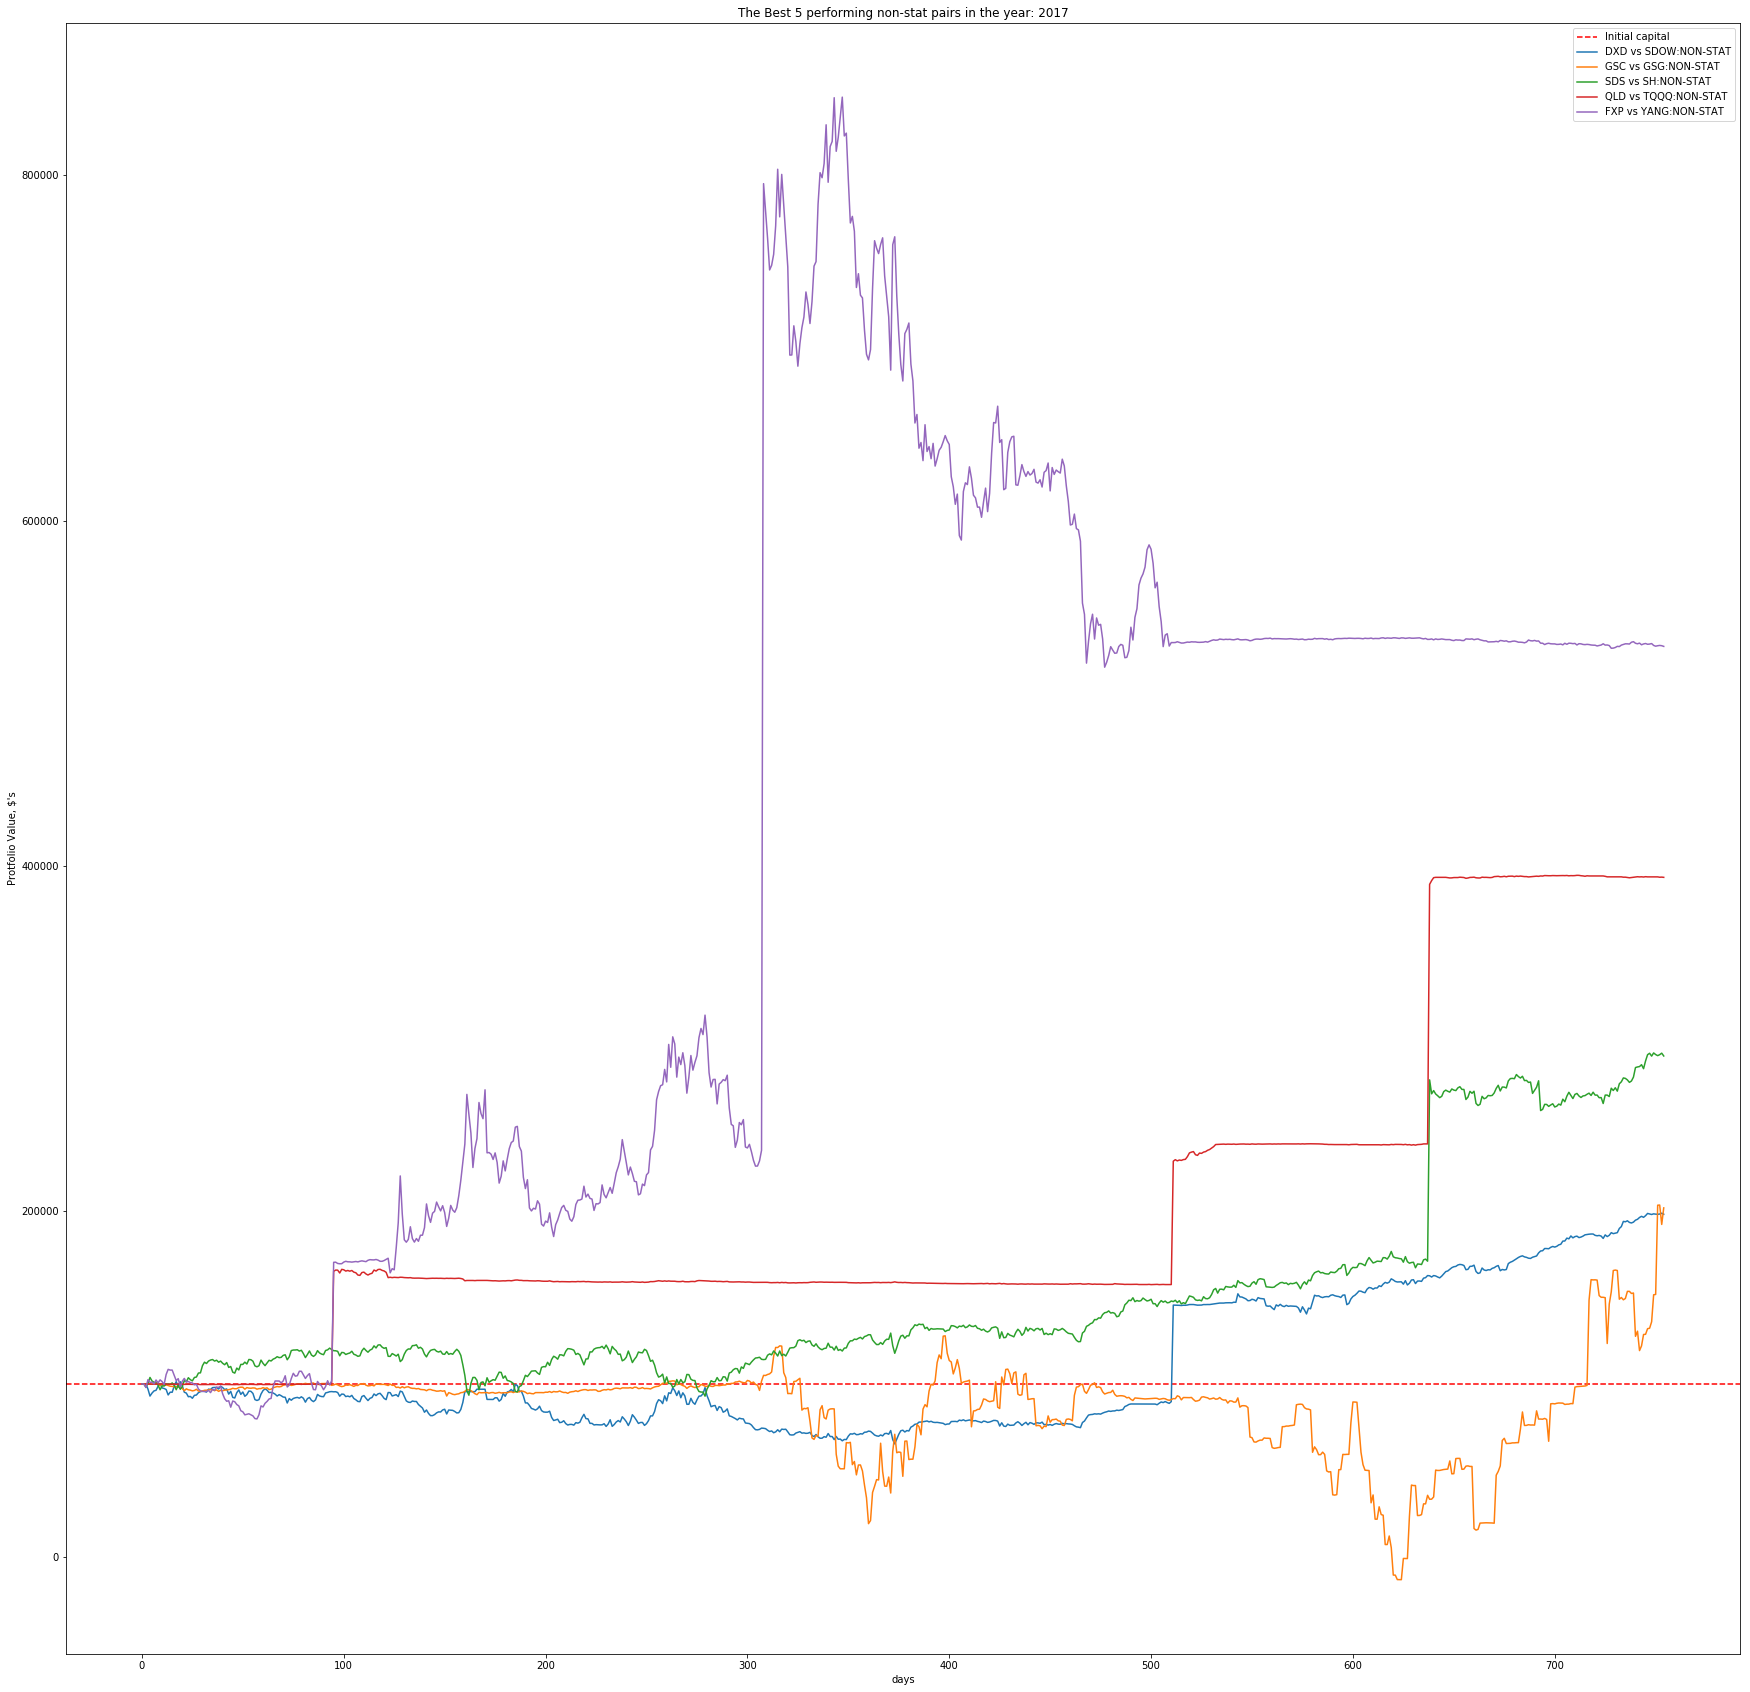

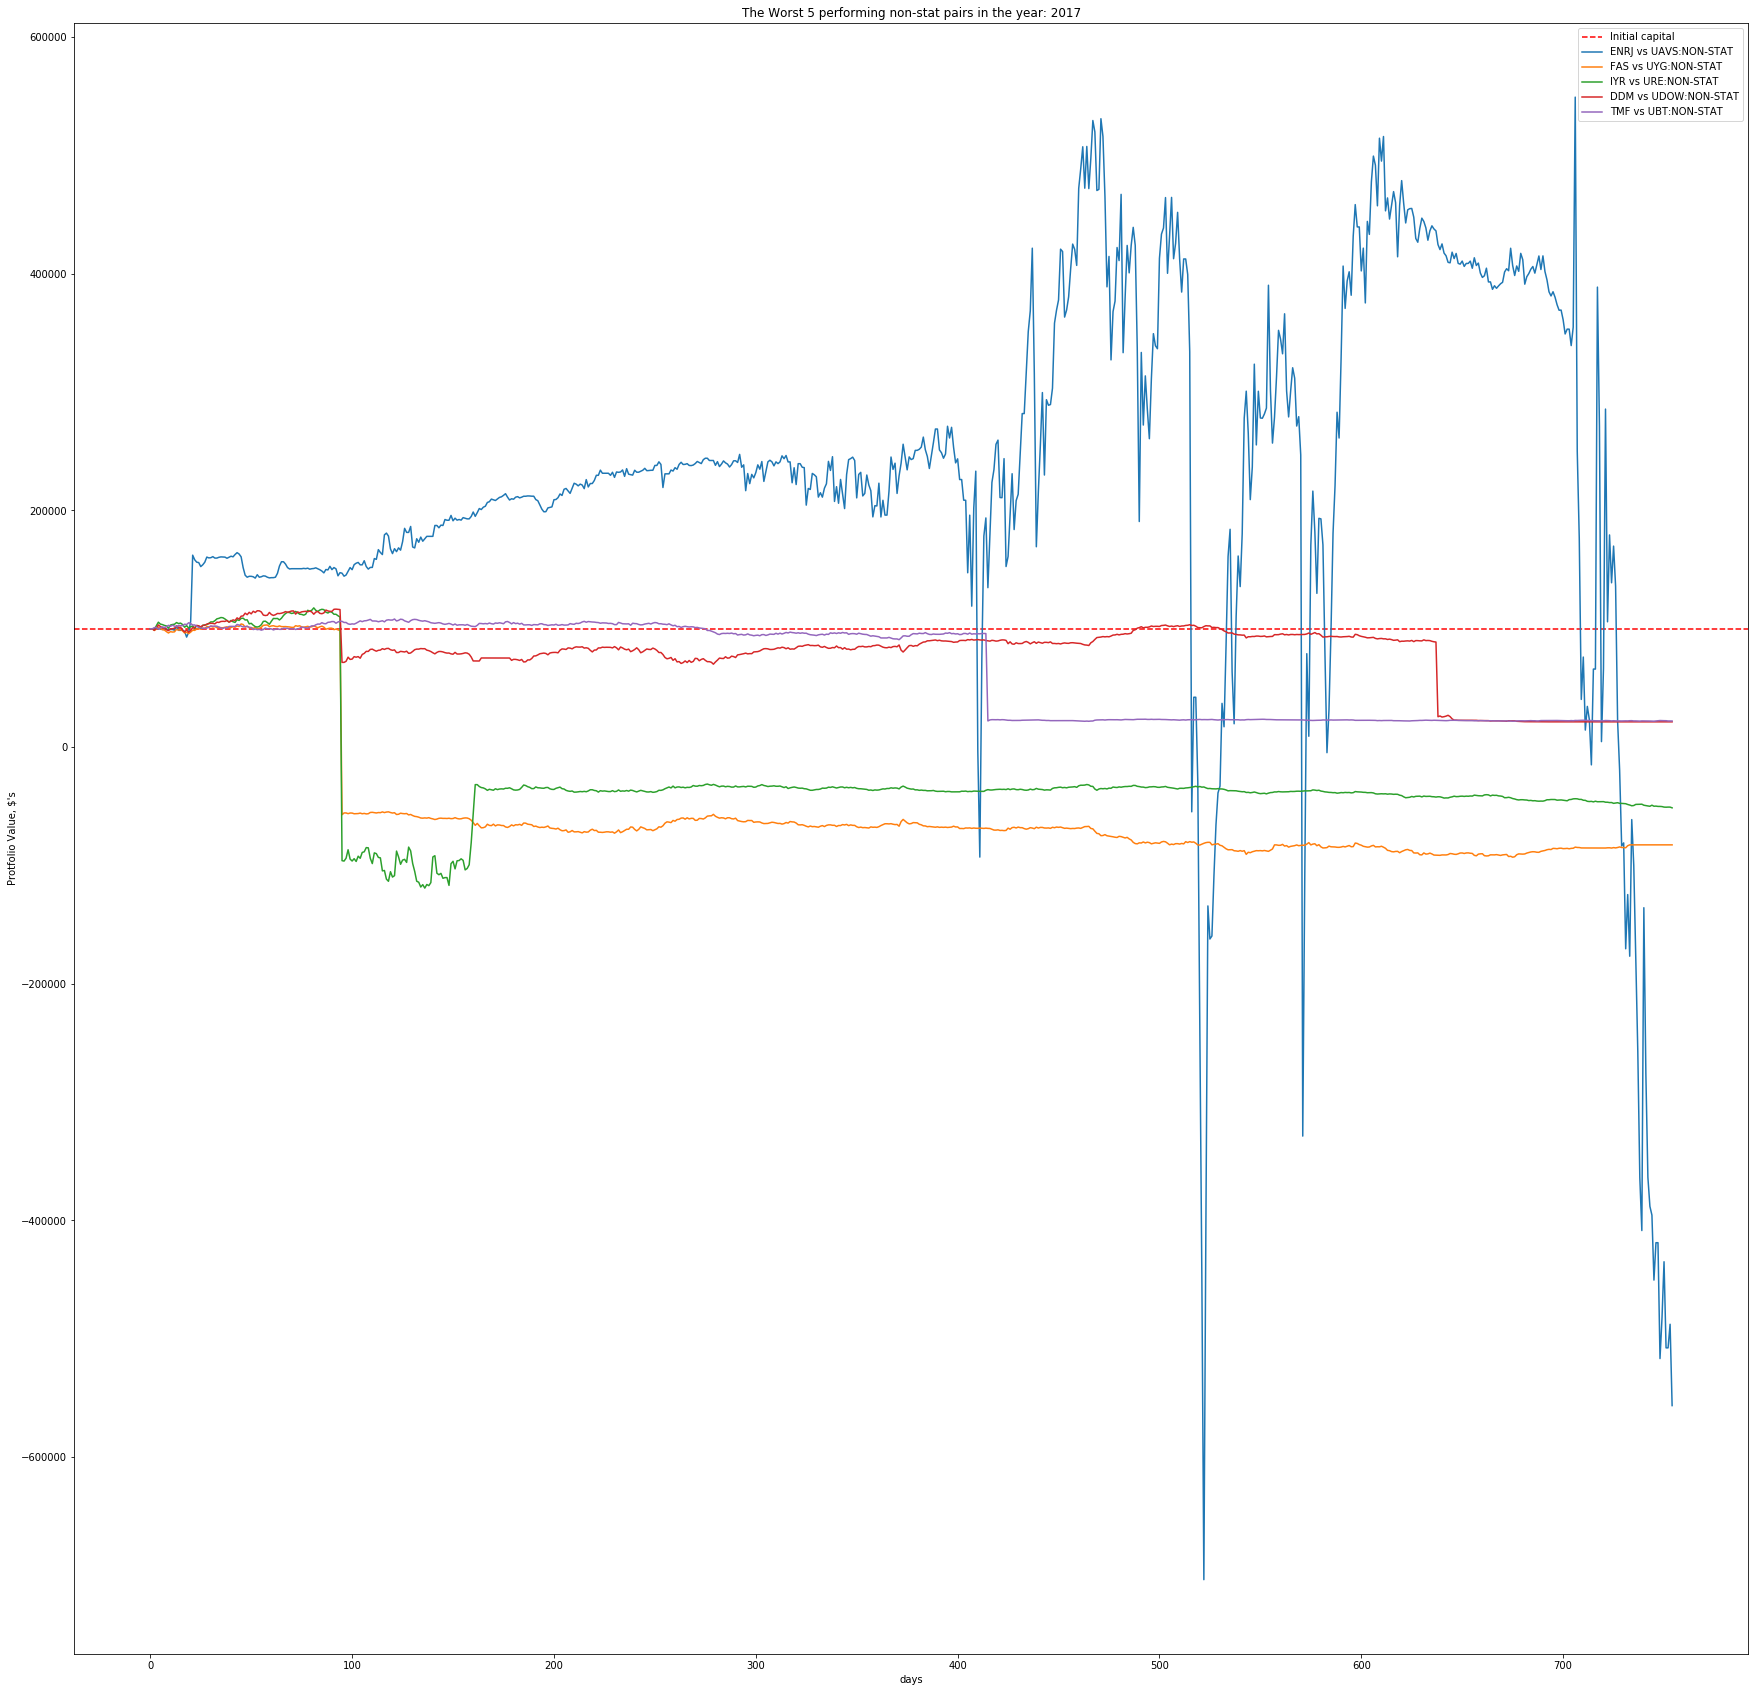

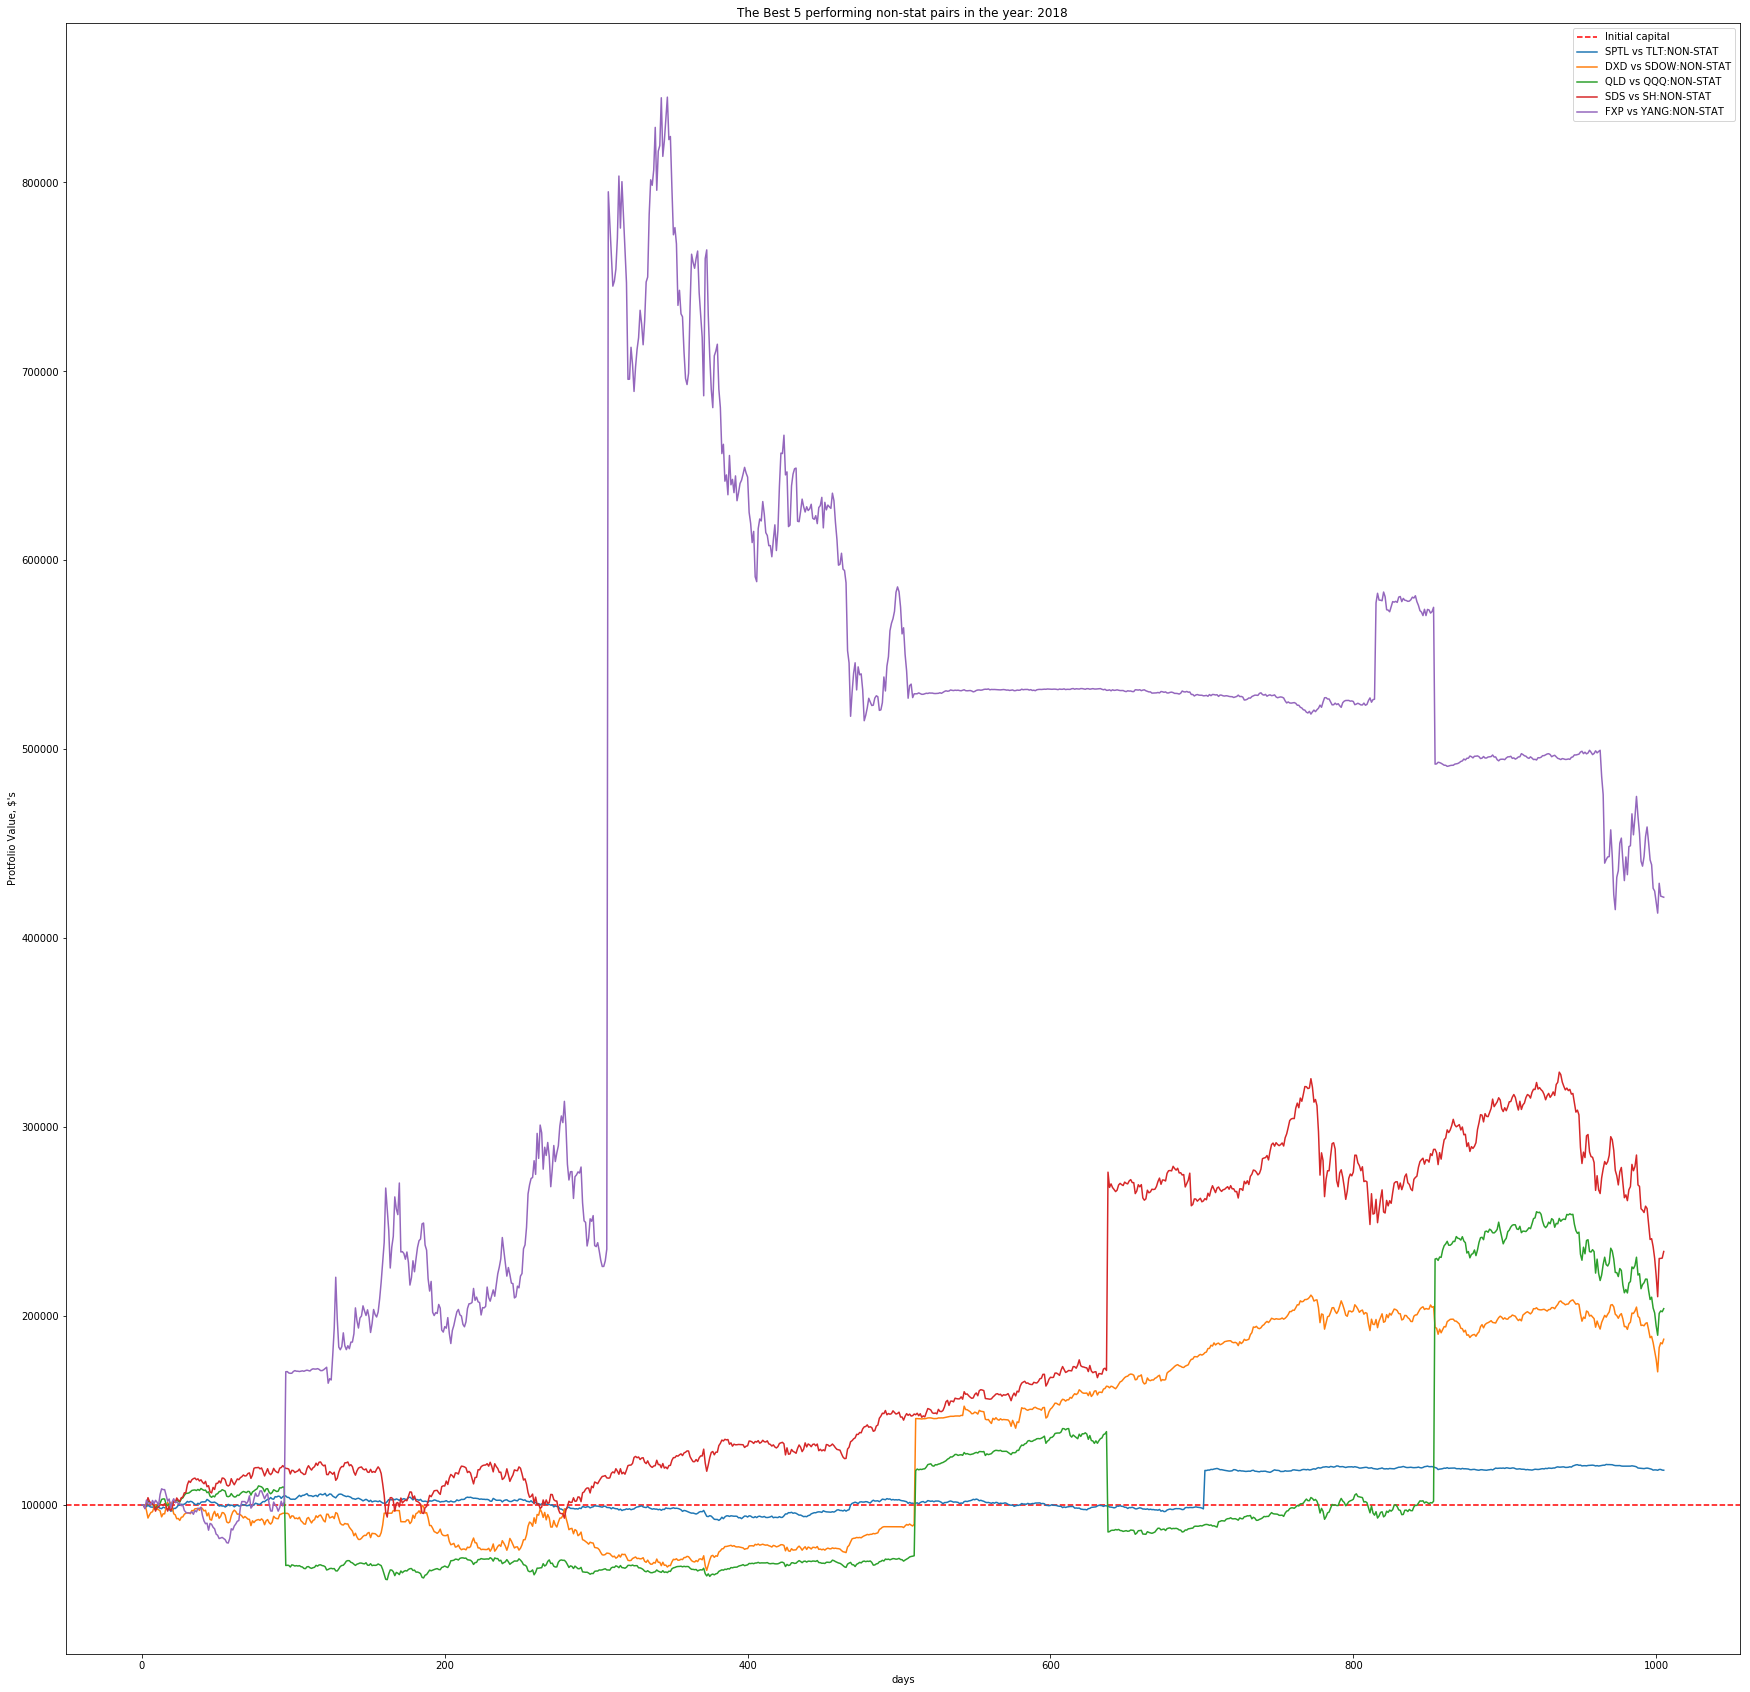

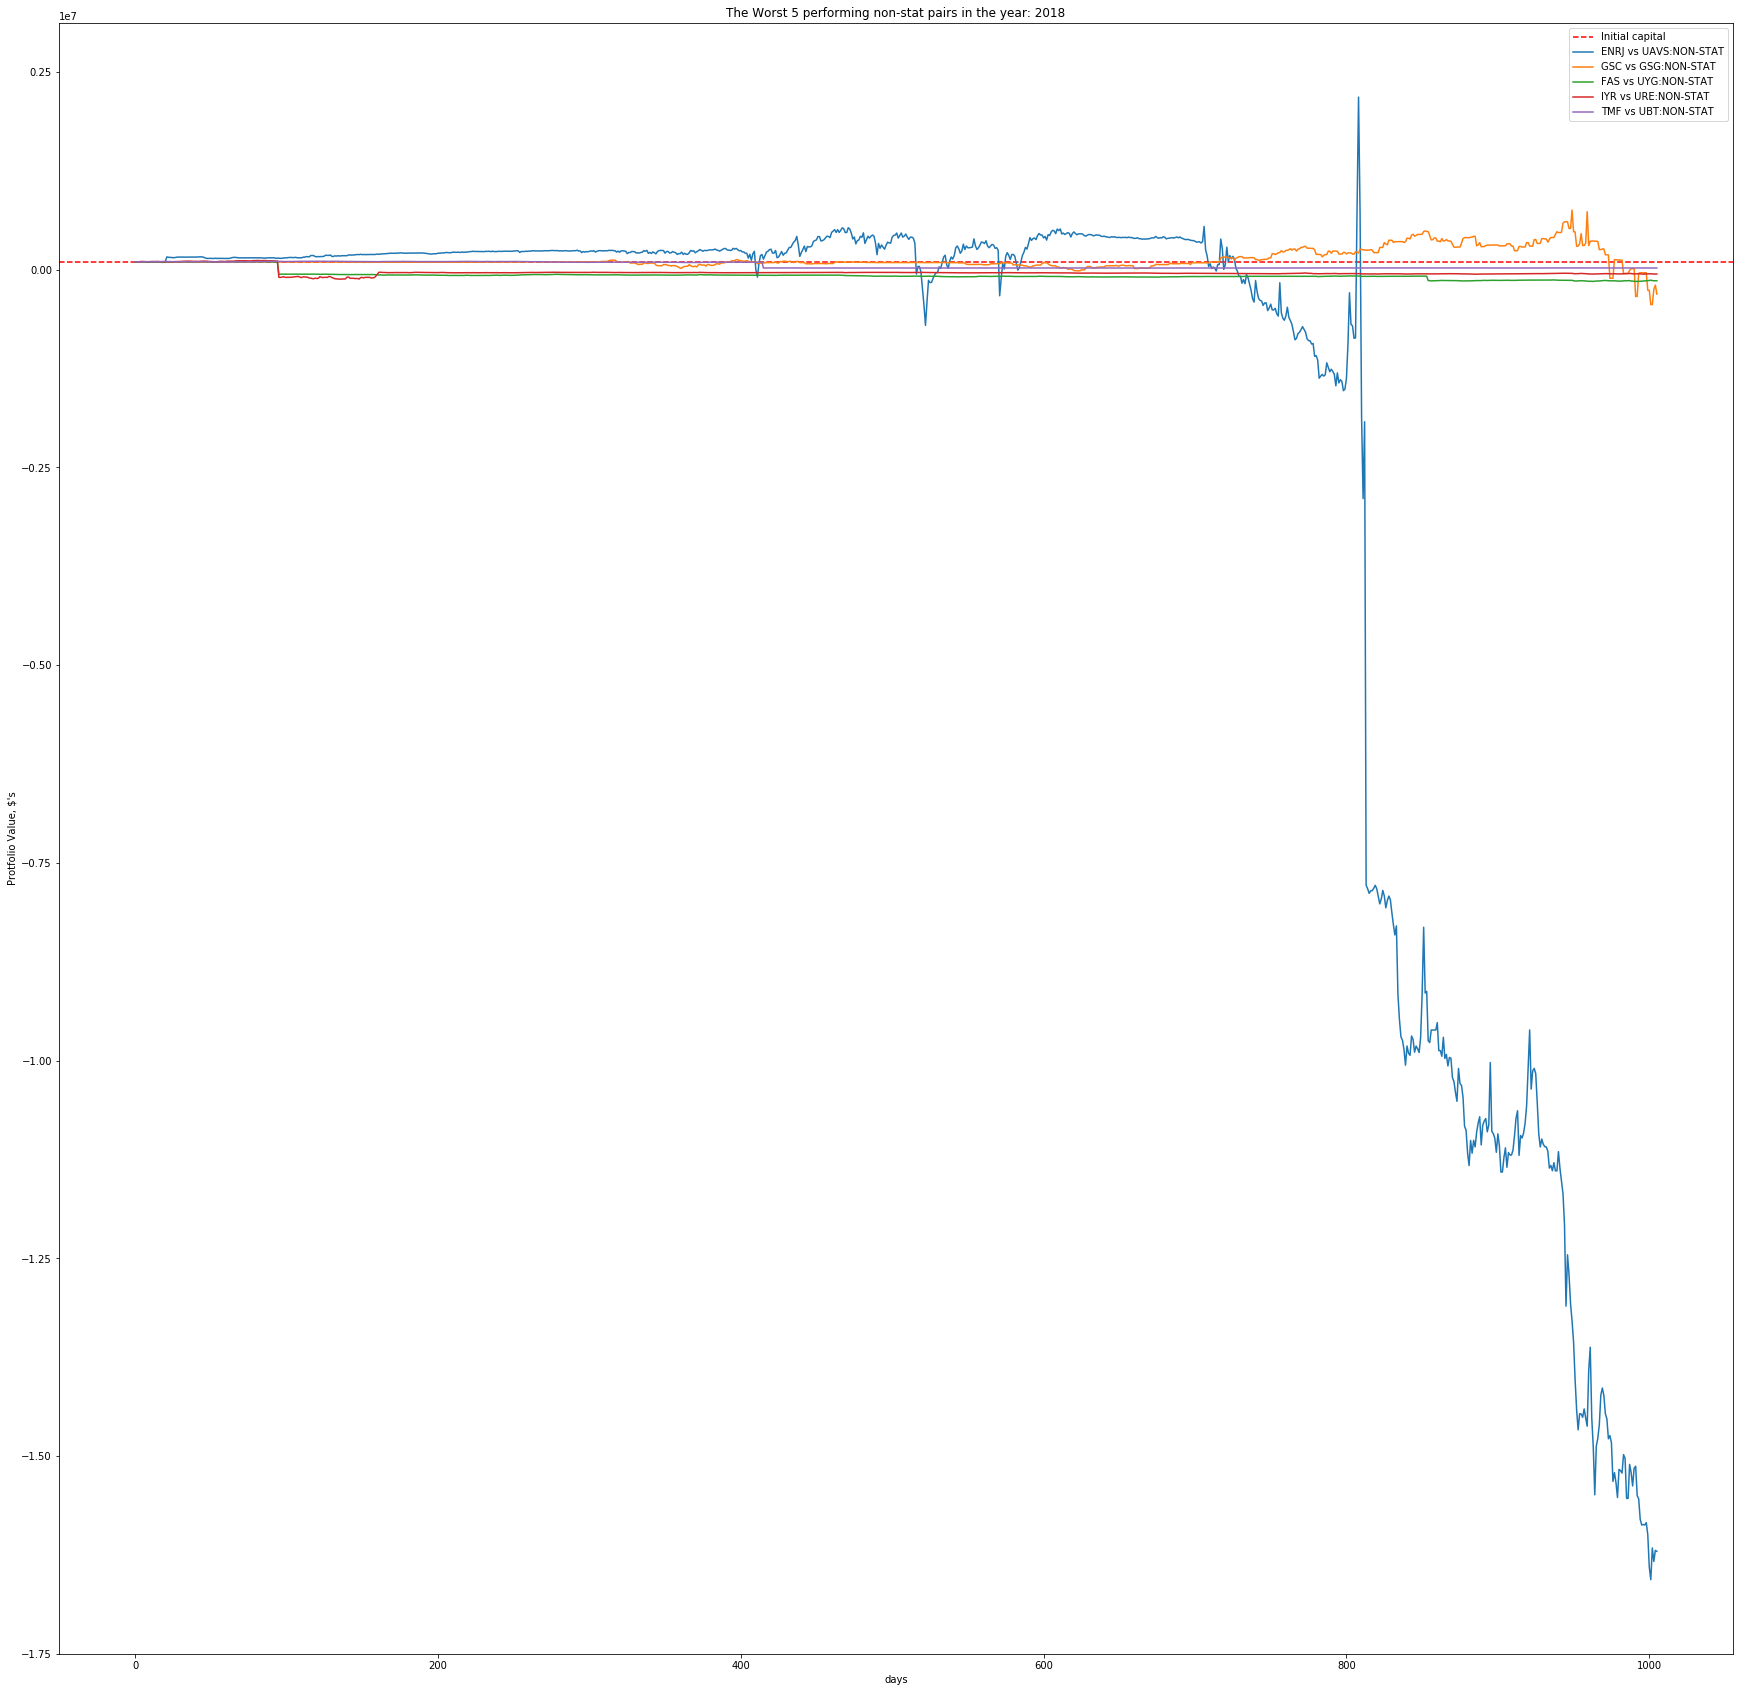

In [10]:
### GETTING NON-STAT AVERAGE RESULTS ### 
nstat_average_perf = OrderedDict()
nstat_pct_mean = OrderedDict()
nstat_pct_std = OrderedDict()
nstat_alpha_mean = OrderedDict()
nstat_beta_mean = OrderedDict()
nstat_sharpe_mean = OrderedDict()
nstat_maxdraw_mean = OrderedDict()

best_5_perf_nstat = OrderedDict()
worst_5_perf_nstat = OrderedDict()

best_5_alpha_nstat = OrderedDict()
best_5_beta_nstat = OrderedDict()
best_5_sharpe_nstat = OrderedDict()
best_5_maxdraw_nstat = OrderedDict()

worst_5_alpha_nstat = OrderedDict()
worst_5_beta_nstat = OrderedDict()
worst_5_sharpe_nstat = OrderedDict()
worst_5_sharpe_nstat = OrderedDict()
worst_5_maxdraw_nstat = OrderedDict()

data_len_nstat = len(nstat_data)

for year in years:
    nstat_average_perf[year] = round(nstat_data['perf_' + str(year)].mean(), 2)
    nstat_pct_mean[year]     = round(nstat_data['pct_' + str(year)].mean(), 2)
    nstat_pct_std[year]      = round(nstat_data['pct_'+str(year)].std(), 2)
    nstat_alpha_mean[year]   = round(nstat_data['alpha_' + str(year)].mean(), 2)
    nstat_beta_mean[year]    = round(nstat_data['beta_' + str(year)].mean(), 2)
    nstat_sharpe_mean[year]  = round(nstat_data['sharpe_' + str(year)].mean(), 2)
    nstat_maxdraw_mean[year] = round(nstat_data['maxdraw_'+str(year)].mean(), 2)
    
    d = pd.read_csv(file_data + '/pair_sim_' + str(year)+'.csv')
    best_idx = [nstat_data['perf_'+str(year)].sort_values()[data_len_nstat-5:data_len_nstat].index[i] for i in range(5)]
    worst_idx = [nstat_data['perf_'+str(year)].sort_values()[:5].index[i] for i in range(5)]
    
    best_5_perf_nstat[year] = [(best_idx[i], d[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_perf_nstat[year] = [(worst_idx[i], d[worst_idx[i]]) for i in range(len(worst_idx))]
    
    best_5_alpha_nstat[year] = [(best_idx[i], nstat_data['alpha_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_alpha_nstat[year] = [(worst_idx[i], nstat_data['alpha_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]
    
    best_5_beta_nstat[year] = [(best_idx[i], nstat_data['beta_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_beta_nstat[year] = [(worst_idx[i], nstat_data['beta_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]

    best_5_sharpe_nstat[year] = [(best_idx[i], nstat_data['sharpe_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_sharpe_nstat[year] = [(worst_idx[i], nstat_data['sharpe_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]

    best_5_maxdraw_nstat[year] = [(best_idx[i], nstat_data['maxdraw_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_maxdraw_nstat[year] = [(worst_idx[i], nstat_data['maxdraw_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]
    
#### AVERAGE NON-STAT
colnames = ['average portfolio value', 'average percentage change', 'average standard deviation',
            'average alpha', 'average beta', 'average sharpe ratio', 'average max drawdown']

list_of_dicts = [nstat_average_perf,nstat_pct_mean, nstat_pct_std,
                 nstat_alpha_mean, nstat_beta_mean,nstat_sharpe_mean, nstat_maxdraw_mean ]

main_df = pd.DataFrame()
main_df['year'] = pd.Series(years)

for i in range(len(list_of_dicts)):
    df = pd.DataFrame(data=list(list_of_dicts[i].items()) , columns=['year', colnames[i]] )
    main_df = pd.concat([main_df, df[colnames[i]]], axis=1)
main_df.to_latex(buf=file_data+'non-stat-perf.txt', index=True)

for year in years:
    fig, ax = plt.subplots(figsize = (30, 30))
    ax.set_ylabel("Protfolio Value, $'s")
    ax.set_xlabel('days')
    plt.axhline(100000, color='red', ls='--', label='Initial capital')
    plt.title('The Best 5 performing non-stat pairs in the year: {}'.format(year))
    
    for i in range(len(best_5_perf_nstat[year])):
        ax.plot(best_5_perf_nstat[year][i][1])
    plt.legend(loc='best')
    plt.savefig(fname=file_data + 'PLOTS/NON STAT/best_5_stat_year_' + str(year) + '.png')
    plt.show()
    
    fig1, ax1 = plt.subplots(figsize = (30, 30))
    ax1.set_ylabel("Protfolio Value, $'s")
    ax1.set_xlabel('days')
    plt.axhline(100000, color='red', ls='--', label='Initial capital')    
    
    for i in range(len(worst_5_perf_nstat[year])):
        ax1.plot(worst_5_perf_nstat[year][i][1])
        plt.title('The Worst 5 performing non-stat pairs in the year: {}'.format(year))
    plt.legend(loc='best')
    plt.savefig(fname=file_data + 'PLOTS/NON STAT/worst_5_stat_year_' + str(year) + '.png')
    plt.show() 

In [11]:
count_aboves_nstat = []
nstat_perf = []
nstat_alpha = []
nstat_beta = []
nstat_sharpe = []
nstat_maxdraw = []

num_of_tradable_pairs = []
for year in years:
    above = nstat_data[nstat_data['perf_' + str(year)] > 100000]
    nstat_yearly_best = above[['perf_'+str(year), 'alpha_'+str(year), 'beta_'+str(year),
                         'sharpe_'+str(year), 'maxdraw_'+str(year)]]
    
    nstat_yearly_best.to_latex(buf=file_data + 'nstat_yearly_best_part2_' + str(year) + '.txt', index=True)
    count_aboves_nstat.append((year, len(above)))
    
    nstat_perf.append(round(above['perf_'+str(year)].mean(), 2))
    nstat_alpha.append(round(above['alpha_'+str(year)].mean(), 2))
    nstat_beta.append(round(above['beta_'+str(year)].mean(), 2))
    nstat_sharpe.append(round(above['sharpe_'+str(year)].mean(), 2))
    nstat_maxdraw.append(round(above['maxdraw_'+str(year)].mean(), 2))
    print('---- NON-STATONAIRY PAIRS ----')
    print(nstat_yearly_best)
    
    
    
count_aboves_stat = []
stat_perf = []
stat_alpha = []
stat_beta = []
stat_sharpe = []
stat_maxdraw = []
for year in years:
    above = stat_data[stat_data['perf_' + str(year)] > 100000]
    stat_yearly_best = above[['perf_'+str(year), 'alpha_'+str(year), 'beta_'+str(year),
                         'sharpe_'+str(year), 'maxdraw_'+str(year)]]
    stat_yearly_best.to_latex(buf=file_data + 'stat_yearly_best_part2_' + str(year) + '.txt', index=True)
    
    count_aboves_stat.append((year, len(above)))
    
    stat_perf.append(round(above['perf_'+str(year)].mean(), 2))
    stat_alpha.append(round(above['alpha_'+str(year)].mean(), 2))
    stat_beta.append(round(above['beta_'+str(year)].mean(),2))
    stat_sharpe.append(round(above['sharpe_'+str(year)].mean(), 2))
    stat_maxdraw.append(round(above['maxdraw_'+str(year)].mean(), 2))
    
    print('---- STATIONARY PAIRS ----')
    print(stat_yearly_best)
    
    
    
count_nstat = pd.DataFrame(data=count_aboves_nstat, columns = ['year', 'count_pos'])
count_nstat['pos %'] = count_nstat.count_pos/len(nstat_data)
count_nstat['avg_perf'] = nstat_perf
count_nstat['avg_alpha'] = nstat_alpha
count_nstat['avg_beta'] = nstat_beta
count_nstat['avg_sharpe'] = nstat_sharpe
count_nstat['avg_maxdraw'] = nstat_maxdraw

count_nstat.to_latex(buf=file_data + 'nstat_count_year_part2_.txt', index=False)
print(count_nstat)

count_stat = pd.DataFrame(data=count_aboves_stat, columns = ['year', 'count_pos'])
count_stat['pos %'] = count_stat.count_pos/len(stat_data)
count_stat['avg_perf'] = stat_perf
count_stat['avg_alpha'] = stat_alpha
count_stat['avg_beta'] = stat_beta
count_stat['avg_sharpe'] = stat_sharpe
count_stat['avg_maxdraw'] = stat_maxdraw

count_stat.to_latex(buf=file_data + 'stat_count_year_part2.txt', index=False)
print(count_stat)

---- NON-STATONAIRY PAIRS ----
                      perf_2015  alpha_2015  beta_2015  sharpe_2015  \
EDV vs UBT:NON-STAT      101271    0.013361  -0.007233     0.396629   
IWV vs SCHB:NON-STAT     101184    0.010353   0.127524     0.231464   
PHYS vs SGOL:NON-STAT    100509    0.005511  -0.010170     0.272748   
FXP vs YANG:NON-STAT     222411    1.114128  -1.373221     1.292654   
FUTY vs XLU:NON-STAT     100330    0.006292  -0.086884     0.099097   
VPU vs XLU:NON-STAT      103220    0.030185   0.134445     0.562645   
SCHB vs VONE:NON-STAT    100663    0.008686  -0.037758     0.160732   
IWB vs SCHB:NON-STAT     102833    0.033906  -0.172488     0.497238   
SRTY vs TZA:NON-STAT     106119    0.078467  -0.334243     0.474711   
MGC vs VV:NON-STAT       100242    0.001632   0.044004     0.113038   
IWV vs IYY:NON-STAT      100502    0.004949   0.006169     0.383662   
TMF vs UBT:NON-STAT      105041    0.051995   0.107992     0.522493   
TNA vs URTY:NON-STAT     100465    0.010122  -